## Classification ML project

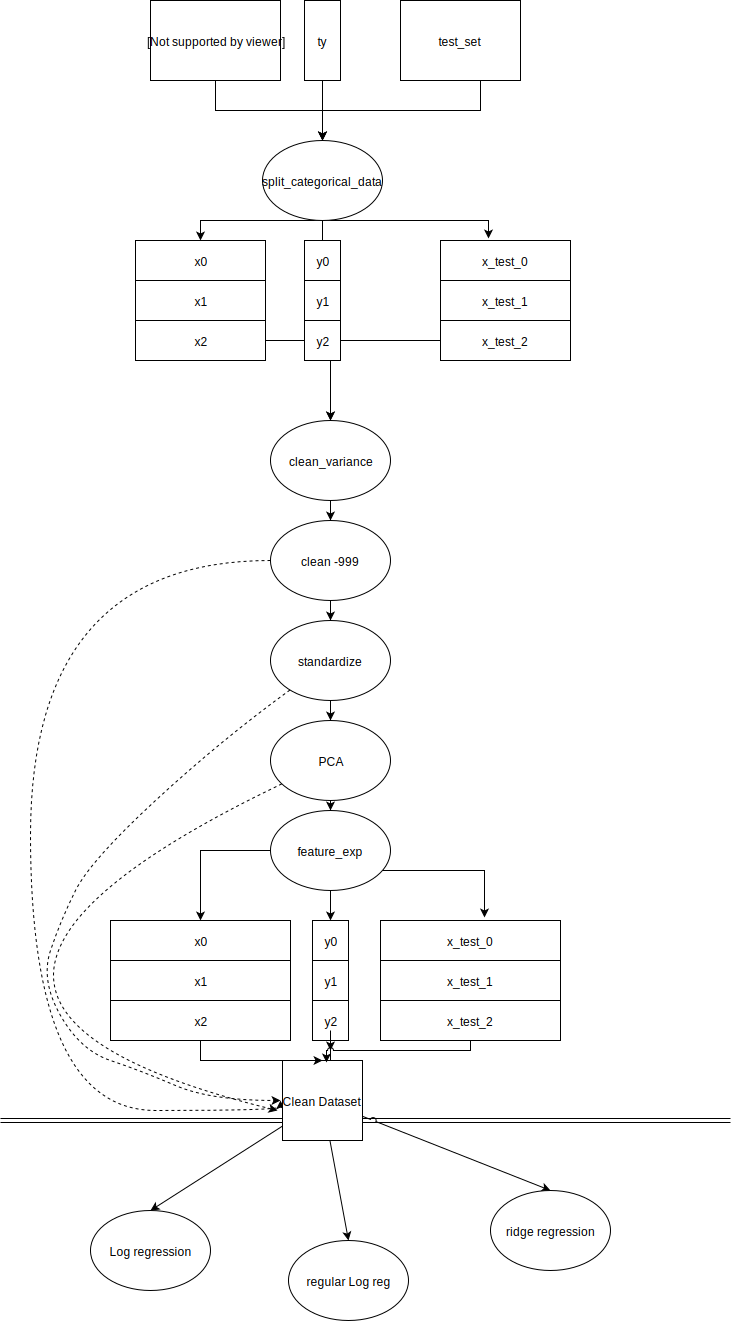

In [1]:
from IPython.core.display import SVG
SVG(filename='pipeline.svg')

## Loading the Data

In [175]:
import logistic as log
import split as spl
import least_squares as lst
import helpers as hlp
import pre_processing as pre

In [176]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
DATA_TEST_PATH = '../data/test.csv'

In [177]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import pandas as pd # cannot use external libraries, just pandas for data exploration

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
y, tX, ids = hlp.load_csv_data(DATA_TRAIN_PATH)
_, tX_test, ids_test = hlp.load_csv_data(DATA_TEST_PATH)

In [179]:
print(tX.shape)
print(y.shape)

(250000, 30)
(250000,)


## Data exploration

In [7]:
data = pd.read_csv(DATA_TRAIN_PATH)
test_data = pd.read_csv(DATA_TEST_PATH)
dic = {'s':1,'b':-1}
data.Prediction = data.Prediction.map(dic)
test_data.Prediction = test_data.Prediction.map(dic)
data.head(10)

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,1,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,-1,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,-1,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,-1,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,-1,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,-1,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,1,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,1,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,...,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,-1,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,...,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,1,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,...,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


In [8]:
mask = data.isin([-999]).any(axis = 1)
print(len(data[mask]))
print(len(data))

181886
250000


_The vast majoriy of our data has -999 values: we'd better handle it carefully_

In [ ]:
#data.replace(to_replace = -999,value = np.nan, inplace = True)

In [ ]:
#replace_val = np.nan
#tX = np.where(tX == -999,replace_val,tX)

In [9]:
std = np.nanstd(tX,axis = 0)
mean = np.nanmean(tX,axis = 0)

In [9]:
print('Train set size: {} samples x {} features'.format(pd.DataFrame(tX).shape[0], pd.DataFrame(tX).shape[1]))
print('Test set size: {} samples x {} features'.format(test_data.shape[0], pd.DataFrame(tX).shape[1]))

Train set size: 250000 samples x 30 features
Test set size: 568238 samples x 30 features


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
Id                             250000 non-null int64
Prediction                     250000 non-null int64
DER_mass_MMC                   250000 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           250000 non-null float64
DER_mass_jet_jet               250000 non-null float64
DER_prodeta_jet_jet            250000 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         250000 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta  

In [11]:
data.describe()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-0.314664,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,72168.927986,0.949205,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,100000.000000,-1.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,162499.750000,-1.000000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,224999.500000,-1.000000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,287499.250000,1.000000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,349999.000000,1.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


## Class separation - Justification

In [59]:
col_names = list(data.columns)[2:]

data_0 = data[data['PRI_jet_num'] == 0]
data_1 = data[data['PRI_jet_num'] == 1]
data_2 = data[data['PRI_jet_num'] >= 2]

print(data_0.shape[0] + data_1.shape[0] + data_2.shape[0])

250000


In [174]:
print(data_0.shape[0])
print(data_1.shape[0])
print(data_2.shape[0])

99913
77544
72543


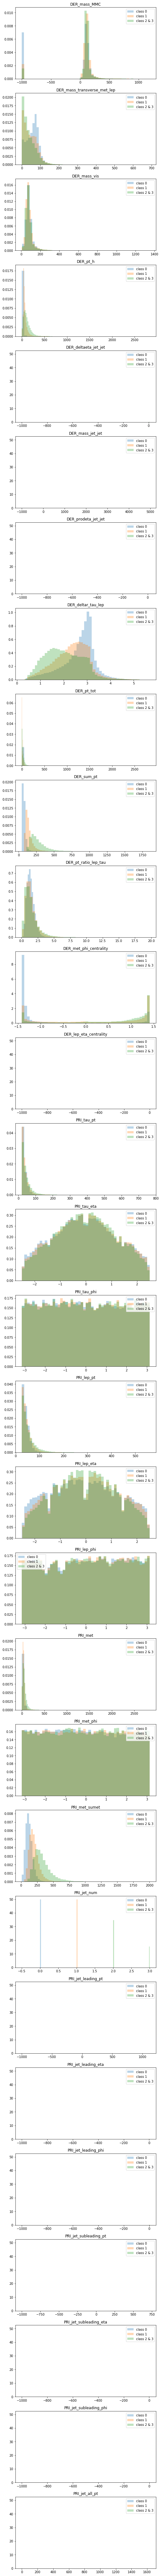

In [67]:
fig, axes = plt.subplots(30, 1, figsize=(8, 150), sharex=False)
for idx, name in enumerate(col_names):    
    axes[idx].hist(data_0[name], bins=50, density=True, alpha=0.3, label='class 0')
    axes[idx].hist(data_1[name], bins=50, density=True, alpha=0.3, label='class 1')
    axes[idx].hist(data_2[name], bins=50, density=True, alpha=0.3, label='class 2 & 3')
    axes[idx].set_title(name)
    axes[idx].legend()

In [ ]:
# Interesting features
interesting_features = ['DER_mass_transverse_met_lep', 'DER_deltar_tau_lep', 'DER_sum_pt', 'PRI_met_sumet']
plt.subplots(figsize=(10,10))
plt.subplot(1,2)

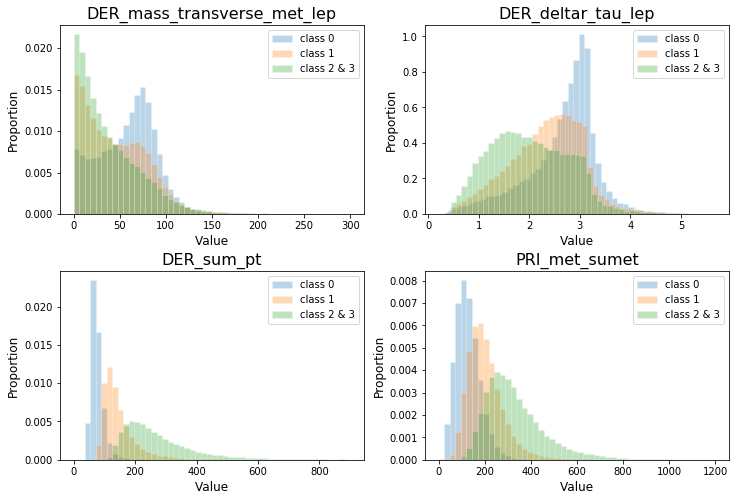

In [202]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(data_0['DER_mass_transverse_met_lep'], bins=50, density=True, alpha=0.3, label='class 0', edgecolor='w', lw=.5, range=(0,300))
ax0.hist(data_1['DER_mass_transverse_met_lep'], bins=50, density=True, alpha=0.3, label='class 1', edgecolor='w', lw=.5, range=(0,300))
ax0.hist(data_2['DER_mass_transverse_met_lep'], bins=50, density=True, alpha=0.3, label='class 2 & 3', edgecolor='w', lw=.5, range=(0,300))
ax0.legend()
ax0.set_xlabel('Value', fontsize=12)
ax0.set_ylabel('Proportion', fontsize=12)
ax0.set_title('DER_mass_transverse_met_lep', fontsize=16)

ax1.hist(data_0['DER_deltar_tau_lep'], bins=50, density=True, alpha=0.3, label='class 0', edgecolor='w', lw=.5)
ax1.hist(data_1['DER_deltar_tau_lep'], bins=50, density=True, alpha=0.3, label='class 1', edgecolor='w', lw=.5)
ax1.hist(data_2['DER_deltar_tau_lep'], bins=50, density=True, alpha=0.3, label='class 2 & 3', edgecolor='w', lw=.5)
ax1.legend()
ax1.set_xlabel('Value', fontsize=12)
ax1.set_ylabel('Proportion', fontsize=12)
ax1.set_title('DER_deltar_tau_lep',fontsize=16)

ax2.hist(data_0['DER_sum_pt'], bins=50, density=True, alpha=0.3, label='class 0', edgecolor='w', lw=.5, range=(0,900))
ax2.hist(data_1['DER_sum_pt'], bins=50, density=True, alpha=0.3, label='class 1', edgecolor='w', lw=.5, range=(0,900))
ax2.hist(data_2['DER_sum_pt'], bins=50, density=True, alpha=0.3, label='class 2 & 3', edgecolor='w', lw=.5, range=(0,900))
ax2.legend()
ax2.set_xlabel('Value', fontsize=12)
ax2.set_ylabel('Proportion', fontsize=12)
ax2.set_title('DER_sum_pt', fontsize=16)


ax3.hist(data_0['PRI_met_sumet'], bins=50, density=True, alpha=0.3, label='class 0', edgecolor='w', lw=.5, range=(0,1200))
ax3.hist(data_1['PRI_met_sumet'], bins=50, density=True, alpha=0.3, label='class 1', edgecolor='w', lw=.5, range=(0,1200))
ax3.hist(data_2['PRI_met_sumet'], bins=50, density=True, alpha=0.3, label='class 2 & 3', edgecolor='w', lw=.5, range=(0,1200))
ax3.legend()
#ax3.ticklabel_format(useMathText=True)
#ax3.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2e'))
ax3.set_xlabel('Value', fontsize=12)
ax3.set_ylabel('Proportion', fontsize=12)
ax3.set_title('PRI_met_sumet', fontsize=16)

fig.subplots_adjust(hspace=0.3)

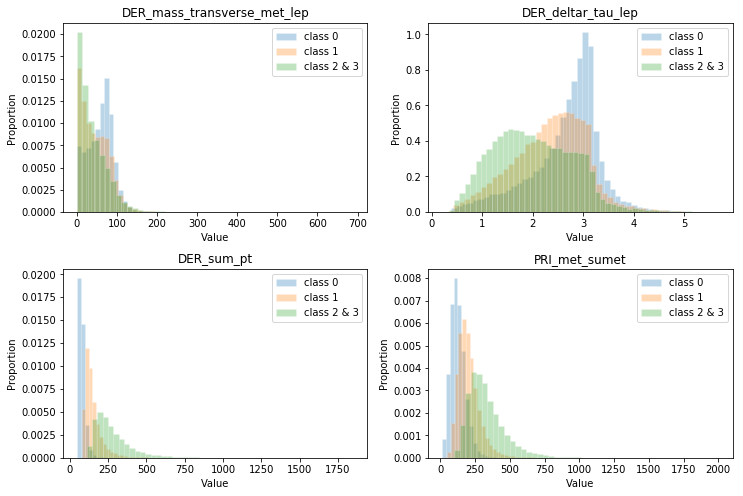

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(data_0['DER_mass_transverse_met_lep'], bins=50, density=True, alpha=0.3, label='class 0', edgecolor='w', lw=.5)
ax0.hist(data_1['DER_mass_transverse_met_lep'], bins=50, density=True, alpha=0.3, label='class 1', edgecolor='w', lw=.5)
ax0.hist(data_2['DER_mass_transverse_met_lep'], bins=50, density=True, alpha=0.3, label='class 2 & 3', edgecolor='w', lw=.5)
ax0.legend()
ax0.set_xlabel('Value', fontsize=10)
ax0.set_ylabel('Proportion', fontsize=10)
ax0.set_title('DER_mass_transverse_met_lep', fontsize=12)

ax1.hist(data_0['DER_deltar_tau_lep'], bins=50, density=True, alpha=0.3, label='class 0', edgecolor='w', lw=.5)
ax1.hist(data_1['DER_deltar_tau_lep'], bins=50, density=True, alpha=0.3, label='class 1', edgecolor='w', lw=.5)
ax1.hist(data_2['DER_deltar_tau_lep'], bins=50, density=True, alpha=0.3, label='class 2 & 3', edgecolor='w', lw=.5)
ax1.legend()
ax1.set_xlabel('Value', fontsize=10)
ax1.set_ylabel('Proportion', fontsize=10)
ax1.set_title('DER_deltar_tau_lep',fontsize=12)

ax2.hist(data_0['DER_sum_pt'], bins=50, density=True, alpha=0.3, label='class 0', edgecolor='w', lw=.5)
ax2.hist(data_1['DER_sum_pt'], bins=50, density=True, alpha=0.3, label='class 1', edgecolor='w', lw=.5)
ax2.hist(data_2['DER_sum_pt'], bins=50, density=True, alpha=0.3, label='class 2 & 3', edgecolor='w', lw=.5)
ax2.legend()
ax2.set_xlabel('Value', fontsize=10)
ax2.set_ylabel('Proportion', fontsize=10)
ax2.set_title('DER_sum_pt', fontsize=12)


ax3.hist(data_0['PRI_met_sumet'], bins=50, density=True, alpha=0.3, label='class 0', edgecolor='w', lw=.5)
ax3.hist(data_1['PRI_met_sumet'], bins=50, density=True, alpha=0.3, label='class 1', edgecolor='w', lw=.5)
ax3.hist(data_2['PRI_met_sumet'], bins=50, density=True, alpha=0.3, label='class 2 & 3', edgecolor='w', lw=.5)
ax3.legend()
#ax3.ticklabel_format(useMathText=True)
#ax3.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2e'))
ax3.set_xlabel('Value', fontsize=10)
ax3.set_ylabel('Proportion', fontsize=10)
ax3.set_title('PRI_met_sumet', fontsize=12)

fig.subplots_adjust(hspace=0.3)

In [203]:
#Save figure
fig.savefig("classes_comparison_2.png")

## Data Cleaning

In [13]:
#totrash before submit: we use pandas to know to which index PRI_jet_num does correspond.
np.where(data.columns.values == "PRI_jet_num")

(array([24], dtype=int64),)

In [180]:
data_trains = spl.split_categorical_data(tX,22,labels = y,split = True)
data_tests = spl.split_categorical_data(tX_test,22,split = True)

In [181]:
mean = 0
stdev = 0
clean_data_trains = []
clean_data_tests = []
for (x_train,y_train),(x_test,_) in zip(data_trains,data_tests):
    x_train,x_test = pre.clean_variance(x_train,x_test)
    
    x_train = pre.clean_value(x_train,-999,np.nan)
    x_test = pre.clean_value(x_test,-999,np.nan)
    
    x_train,mean,stdev =  pre.standardize_data(x_train)
    x_test,_,_ = pre.standardize_data(x_test, mean,stdev)
    
    x_train = pre.clean_value(x_train,np.nan,0,inplace = True)
    x_test = pre.clean_value(x_test,np.nan,0,inplace = True)
    
    x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]
    x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]
    
    clean_data_trains.append((x_train,y_train))
    clean_data_tests.append((x_test,None))

## Data Processing

_We now need to standardize the function so that they all take the same type of parameters as inputs_

In [28]:
init_w = np.random.rand(clean_data_tests[0][0].shape[1])
maxiters = 100
gamma = 0.01

#method 1
log_reg = lambda  y, x: log.logistic_regression(y,x,init_w,5,gamma)
#ridge = lambda y, x: lst.ridge_regression(y,x,lambda_)

if (len(clean_data_tests) > 1):
    
    lambda_ = 0.05
    ridge = lambda y, x: lst.ridge_regression(y,x,lambda_)
    
    # method 0
    init_w0 = np.random.rand(clean_data_tests[0][0].shape[1])
    gamma0 = 0.1
    log_reg0 = lambda  y, x: log.logistic_regression(y, x, init_w0, 5, gamma0)
    
    # method 1
    init_w1 = np.random.rand(clean_data_tests[1][0].shape[1])
    gamma1 = 0.1
    log_reg1 = lambda  y, x: log.logistic_regression(y, x, init_w1, 5, gamma1)
    
    # method 2
    init_w2 = np.random.rand(clean_data_tests[2][0].shape[1])
    gamma2 = 0.02
    log_reg2 = lambda  y, x: log.logistic_regression(y, x, init_w2, 5, gamma2)
    
    
    
    #init_w2 = np.random.rand(clean_data_tests[1][0].shape[1])
    #method 2
    #reg_log_reg = lambda y,x : log.reg_logistic_regression(y, x, lambda_, init_w2, maxiters, gamma)
    #log_reg2 = lambda  y, x: log.logistic_regression(y,x,init_w2,5,gamma)

    #init_w3 = np.random.rand(clean_data_tests[2][0].shape[1])
    #method 3
    #lambda_ = 0.05
    #ridge = lambda y, x: lst.ridge_regression(y,x,lambda_)
    #log_reg3 = lambda  y, x: log.logistic_regression(y,x,init_w3,5,gamma)

methods = [log_reg0,log_reg1,log_reg2]

_At this point we try the different models defined in the cell above: to do so run the cell below, and check the obtained accuracies._

In [29]:
accuracies_group_means = []
accuracies_group_stds = []
for round_,((x_train,y_train),meth) in enumerate(zip(clean_data_trains,methods)):
    print("#################################")
    print("**********treating the {i}th group of data:**************".format(i = round_+1))
    acc_mean, acc_std = spl.k_fold_cv(y_train,x_train,5,meth)
    accuracies_group_means.append(acc_mean)
    accuracies_group_stds.append(acc_std)
print("done! Obtained accuracies:",accuracies_group_means)

#################################
**********treating the 1th group of data:**************
1/5 round for the kfold:
logreg 0th iteration:,  loss = 0
[-64.09753368 -57.76776139 -56.48463744 ... -17.88354726 -27.30050634
 -78.30317271]
obtained accur on 1/5 round of kfold: 0.8066259633670303
2/5 round for the kfold:
logreg 0th iteration:,  loss = 0
[   5.23155407  -94.32838666 -108.98532512 ...  -85.81860914 -177.10377446
 -146.5478098 ]
obtained accur on 2/5 round of kfold: 0.8051844067457339
3/5 round for the kfold:
logreg 0th iteration:,  loss = 0
[-152.01024567  -33.43116731 -149.6566316  ... -210.68722071 -175.2487077
  -59.45487633]
obtained accur on 3/5 round of kfold: 0.7941147032329097
4/5 round for the kfold:
logreg 0th iteration:,  loss = 0
[-268.70198324  -51.33394495 -168.27596689 ...  -36.37651106 -205.87488329
 -199.92382372]
obtained accur on 4/5 round of kfold: 0.7975779412500625
5/5 round for the kfold:
logreg 0th iteration:,  loss = 0
[-279.77548895 -219.16538485 -285.2

### Optimization

##### Logistic regression + reg logistic regression

In [182]:
# for logistic regression: for every models test different gammas and degrees
degrees = np.arange(1, 15)
gammas = 0.08 #np.logspace(-3, 0, 12) #fix gamma to iterate over another param: lambda
lambdas = np.logspace(-5, 0, 15)

accuracies_lr = []

# lambda = 0: logistic reg
maxiters = 100
for idx_subset, (x_train, y_train) in enumerate(clean_data_trains):
    print('##### START SUBSET {} #####'.format(idx_subset))
    #print(x_train)
    #accuracy_train = np.zeros((len(gammas), len(degrees))) # change here!
    accuracy_train = np.zeros((len(lambdas), len(degrees)))
    for idx_deg, deg in enumerate(degrees):
        x_poly = lst.build_poly(x_train, deg)
        
        for idx_gamma, gamma in enumerate(gammas):
            for idx_lambda, lbda in enumerate(lambdas):
                init_w = np.random.rand(x_poly.shape[1])
                #log_reg = lambda  y, x: log.logistic_regression(y, x, init_w, maxiters, gamma)
                reg_log_reg = lambda y, x : log.reg_logistic_regression(y, x, lambda_, init_w, maxiters, gamma)
                acc_mean, acc_std = spl.k_fold_cv(y_train, x_poly, 5, reg_log_reg) # change method here
                #np.mean(accuracies)
                
                # update table
                #accuracy_train[idx_gamma][idx_deg] = acc_mean 
                accuracy_train[idx_lambda][idx_deg] = acc_mean 
    
    accuracies_lr.append(accuracy_train)
    print('##### END SUBSET {} #####'.format(idx_subset))


##### START SUBSET 0 #####


TypeError: 'float' object is not iterable

In [107]:
import pickle

with open('acc_rlr_01.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(accuracies, f)

Text(0.5, 1.0, 'Accuracy')

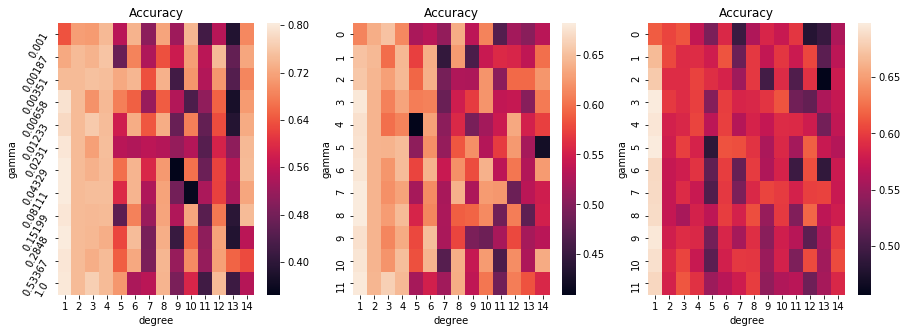

In [23]:
import seaborn as sns

plt.subplots(figsize=(15,5))
plt.subplot(1,3,1)
fig = sns.heatmap(accuracies_lr[0])
fig.set_yticklabels(np.round(gammas, 5), rotation=60)
fig.set_xticklabels(degrees)
fig.set_xlabel('degree')
fig.set_ylabel('gamma')
fig.set_title('Accuracy')
plt.subplot(1,3,2)
fig = sns.heatmap(accuracies_lr[1])
fig.set_xticklabels(degrees)
fig.set_xlabel('degree')
fig.set_ylabel('gamma')
fig.set_title('Accuracy')
plt.subplot(1,3,3)
fig = sns.heatmap(accuracies_lr[2])
fig.set_xticklabels(degrees)
fig.set_xlabel('degree')
fig.set_ylabel('gamma')
fig.set_title('Accuracy')

In [31]:
# y: ↓ (gammas), x: → (degree)
for nb, acc in enumerate(accuracies_lr):
    print('SUBSET {}'.format(nb))
    ymax = np.asscalar(np.where(acc == np.max(acc))[0])
    xmax = np.asscalar(np.where(acc == np.max(acc))[1])
    
    print('Best degree for subset {}: {}'.format(nb, degrees[xmax]))
    print('Best gamma for subset {}: {}'.format(nb, gammas[ymax]))
    print('Accuracy: {}'.format(acc[ymax][xmax]))

SUBSET 0
Best degree for subset 0: 1
Best gamma for subset 0: 0.08111308307896868
Accuracy: 0.803689151192386
SUBSET 1
Best degree for subset 1: 1
Best gamma for subset 1: 0.08111308307896868
Accuracy: 0.6817677540459129
SUBSET 2
Best degree for subset 2: 1
Best gamma for subset 2: 0.006579332246575682
Accuracy: 0.697999805906578


##### Ridge

In [204]:
# for ridge: for every models test different lambdas and degrees
degrees = np.arange(1, 15)
lambdas = np.logspace(-5, 0, 15)

accuracies = []

for idx_subset, (x_train, y_train) in enumerate(clean_data_trains):
    print('##### START SUBSET {} #####'.format(idx_subset))
    print(x_train)
    accuracy_train = np.zeros((len(lambdas), len(degrees)))
    for idx_deg, deg in enumerate(degrees):
        x_poly = lst.build_poly(x_train, deg)
        
        for idx_lambda, lambda_ in enumerate(lambdas):
            ridge = lambda y, x: lst.ridge_regression(y,x,lambda_)
            acc_mean, acc_std = spl.k_fold_cv(y_train, x_poly, 5, ridge)
            
            # update table
            accuracy_train[idx_lambda][idx_deg] = acc_mean
    
    accuracies.append(accuracy_train)
    print('##### END SUBSET {} #####'.format(idx_subset))


##### START SUBSET 0 #####
[[ 1.          0.44903335  0.70713635 ... -0.02240814  0.04662815
  -0.74969971]
 [ 1.          1.06660202 -1.30833757 ... -1.419786   -0.4674532
  -1.37002885]
 [ 1.         -0.29127996 -0.25707397 ...  0.30817503  0.0267496
   0.07427882]
 ...
 [ 1.          0.         -0.0189742  ...  0.74898544 -0.46524447
  -0.85620547]
 [ 1.         -0.49694295 -1.23187692 ... -0.95527452  0.46131675
  -0.24757425]
 [ 1.          0.          0.43650878 ...  0.45294376 -0.86778508
  -0.49835443]]
1/5 round for the kfold:
[ 0.32123924 -1.19640479 -0.68887566 ... -1.30968874 -0.62555121
 -0.20040653]
obtained accur on 1/5 round of kfold: 0.8182364127714944
2/5 round for the kfold:
[-0.58853327 -0.8550931  -1.02928126 ... -0.6225359  -0.33822083
  0.22425756]
obtained accur on 2/5 round of kfold: 0.8156933393384377
3/5 round for the kfold:
[-0.36623542 -0.74631675  0.43674644 ... -0.31036781 -0.76093072
 -0.59537383]
obtained accur on 3/5 round of kfold: 0.8154839355419878


obtained accur on 4/5 round of kfold: 0.8175449131761998
5/5 round for the kfold:
[-1.03344277 -0.59396502 -0.34087144 ...  0.08975015 -0.93345679
 -0.36836568]
obtained accur on 5/5 round of kfold: 0.813391382675274
1/5 round for the kfold:
[-0.87879729 -0.45779886  0.13192879 ... -0.4500597  -1.08714198
 -1.0208391 ]
obtained accur on 1/5 round of kfold: 0.816234611150035
2/5 round for the kfold:
[-0.08416718 -0.840737   -0.18961091 ... -0.86340189 -1.08344219
 -0.86215241]
obtained accur on 2/5 round of kfold: 0.8146424460791672
3/5 round for the kfold:
[-0.04140556 -0.64763597 -0.2427227  ... -1.05775482  0.21357581
 -0.42751319]
obtained accur on 3/5 round of kfold: 0.8190371334200781
4/5 round for the kfold:
[ 0.00892292 -0.66403459 -0.31074602 ... -0.56313344 -0.06732934
  0.28594347]
obtained accur on 4/5 round of kfold: 0.8136415953560526
5/5 round for the kfold:
[-0.36558713 -0.61698182 -0.79946933 ... -0.47846491 -0.78208373
  0.23991865]
obtained accur on 5/5 round of kfold

1/5 round for the kfold:
[-1.0708828  -0.88444932 -0.98592913 ... -1.05970859 -0.56489646
 -1.03467204]
obtained accur on 1/5 round of kfold: 0.824942448203383
2/5 round for the kfold:
[-0.99388544  0.09902841 -0.87175075 ... -0.31885046 -0.93845916
 -0.30344644]
obtained accur on 2/5 round of kfold: 0.8277035480158135
3/5 round for the kfold:
[ 0.50293749 -0.51967349 -1.25393243 ...  0.01307506 -0.67396263
 -1.39445535]
obtained accur on 3/5 round of kfold: 0.8284956460814733
4/5 round for the kfold:
[-0.0160727   0.5017063  -0.93511886 ... -0.44162622 -0.37252605
 -0.03096626]
obtained accur on 4/5 round of kfold: 0.8236501025871992
5/5 round for the kfold:
[-0.2848321  -0.12674369 -1.02844962 ... -0.13314621 -0.03234842
 -0.98706766]
obtained accur on 5/5 round of kfold: 0.8232497622979532
1/5 round for the kfold:
[-1.44946295 -0.03211049 -0.36631554 ... -0.11837535 -0.22307899
 -0.77672088]
obtained accur on 1/5 round of kfold: 0.8236412771494345
2/5 round for the kfold:
[-1.028817

[-0.8596906  -0.90978995 -0.1407812  ... -0.22753195 -0.43658188
 -1.22058585]
obtained accur on 2/5 round of kfold: 0.8284541860581495
3/5 round for the kfold:
[-0.97555988 -1.18554651 -1.04321462 ... -0.67766578  0.06412459
 -0.0577814 ]
obtained accur on 3/5 round of kfold: 0.8300970873786407
4/5 round for the kfold:
[-0.03569918  0.48542648 -0.47664478 ... -0.37151595 -0.51987758
 -0.94279149]
obtained accur on 4/5 round of kfold: 0.831907121052895
5/5 round for the kfold:
[-0.7220392  -0.33415927  0.25007415 ... -0.25943377 -0.49433855
  0.01023922]
obtained accur on 5/5 round of kfold: 0.8292548666366412
1/5 round for the kfold:
[-0.57015385 -0.07143033 -0.8063782  ... -0.90156667 -0.30101014
 -0.47716168]
obtained accur on 1/5 round of kfold: 0.8303473125813232
2/5 round for the kfold:
[-0.53799984 -1.08025952 -0.68285885 ...  0.8858065  -0.54909444
  0.06825051]
obtained accur on 2/5 round of kfold: 0.8287043987389281
3/5 round for the kfold:
[-0.98029209 -0.80050242 -0.7537152

[-0.46013611 -0.93374023 -0.97847365 ...  0.13525301 -0.89627062
 -0.84147441]
obtained accur on 4/5 round of kfold: 0.8300055046789772
5/5 round for the kfold:
[ 0.20540444 -0.29600235 -0.66655611 ... -0.95337466 -0.84001552
 -0.73876625]
obtained accur on 5/5 round of kfold: 0.8283040584496822
1/5 round for the kfold:
[-0.66639161  0.0554187  -1.39976711 ... -0.16983527  0.45651767
  0.0248766 ]
obtained accur on 1/5 round of kfold: 0.820588529676709
2/5 round for the kfold:
[-0.81308724 -0.96565319 -0.22689938 ... -0.11295148  0.18123548
  0.08272   ]
obtained accur on 2/5 round of kfold: 0.8274533353350347
3/5 round for the kfold:
[ 0.28961569  0.2392335  -0.51350405 ...  0.45360123 -0.76190275
 -0.01564584]
obtained accur on 3/5 round of kfold: 0.8198378540686618
4/5 round for the kfold:
[ 0.51626551  0.00503597 -0.94066599 ... -0.64956077  0.25065614
 -0.49076015]
obtained accur on 4/5 round of kfold: 0.8256518040334284
5/5 round for the kfold:
[-0.37577854  0.2585165  -0.7855430

1/5 round for the kfold:
[-0.89035588 -1.11259541  0.11037371 ... -0.86794509 -0.47629531
 -0.0697306 ]
obtained accur on 1/5 round of kfold: 0.830947853067761
2/5 round for the kfold:
[ 0.30720239  0.12191677 -0.33691362 ... -0.63606889 -0.57961266
 -1.18148615]
obtained accur on 2/5 round of kfold: 0.8328579292398539
3/5 round for the kfold:
[-1.10697195 -1.12010976 -0.68613957 ...  0.41091225  0.55908274
 -0.21655113]
obtained accur on 3/5 round of kfold: 0.8327995195676109
4/5 round for the kfold:
[-0.47616601  0.02850813 -0.71332059 ...  0.02657055 -0.91539663
  0.01447055]
obtained accur on 4/5 round of kfold: 0.8317569934444278
5/5 round for the kfold:
[-0.01101809 -0.38562921  0.59288603 ...  0.17963384  0.12611626
 -0.45399822]
obtained accur on 5/5 round of kfold: 0.8347095030776159
1/5 round for the kfold:
[-0.09442231  0.48044218 -0.17302509 ... -0.9004074   0.57947573
 -0.69328115]
obtained accur on 1/5 round of kfold: 0.8294465018516665
2/5 round for the kfold:
[-1.305253

[ 0.04012408  0.00155512 -0.32510566 ... -0.63932913 -0.78973533
  0.88822091]
obtained accur on 2/5 round of kfold: 0.8345593754691488
3/5 round for the kfold:
[-1.35058723 -0.21268675 -0.86289415 ... -0.94357257 -0.72069972
 -0.8476176 ]
obtained accur on 3/5 round of kfold: 0.8386547893103793
4/5 round for the kfold:
[-0.68671416 -0.53064301 -0.52515366 ... -0.38595685  0.40247095
  0.29198794]
obtained accur on 4/5 round of kfold: 0.838812991042386
5/5 round for the kfold:
[-0.72639367 -0.4969699  -0.77011757 ... -0.299548   -0.11492481
 -0.89412371]
obtained accur on 5/5 round of kfold: 0.8316569083721163
1/5 round for the kfold:
[-0.56837848 -1.04731894 -1.38229043 ... -0.66784911  0.25261517
 -0.15146833]
obtained accur on 1/5 round of kfold: 0.8310479431488339
2/5 round for the kfold:
[-0.33858944  0.54018221 -1.02547461 ... -0.95714764 -0.56178636
  0.16080076]
obtained accur on 2/5 round of kfold: 0.8375619276384927
3/5 round for the kfold:
[-0.84577123 -0.60316878 -0.6560920

[ 0.13040568  0.36672175 -0.38166707 ... -0.30501585 -0.67885696
  0.27829727]
obtained accur on 4/5 round of kfold: 0.8290046539558625
5/5 round for the kfold:
[-0.73374268 -0.36342595 -0.62928306 ...  0.72957236 -0.77059214
  0.52631566]
obtained accur on 5/5 round of kfold: 0.8314567382274933
1/5 round for the kfold:
[ 0.01735914 -0.29975989 -0.90500977 ... -0.88838275 -1.1133782
  0.38100745]
obtained accur on 1/5 round of kfold: 0.8260934841357221
2/5 round for the kfold:
[-0.6420195  -1.268547   -0.65655692 ... -0.15204735 -0.53181902
 -0.41494614]
obtained accur on 2/5 round of kfold: 0.8252514637441826
3/5 round for the kfold:
[-0.54316397 -0.08433283 -0.68268651 ... -0.81050688 -0.75494827
  0.16603172]
obtained accur on 3/5 round of kfold: 0.824942448203383
4/5 round for the kfold:
[-0.66936702 -0.34148382 -1.22536142 ...  0.5148942  -0.3443347
 -1.14697706]
obtained accur on 4/5 round of kfold: 0.8258519741780513
5/5 round for the kfold:
[-0.17016748  0.3224748  -0.50630948 

[-0.82263667 -0.73303755 -1.19196242 ... -0.45220916 -0.75415846
 -0.84724848]
obtained accur on 5/5 round of kfold: 0.842916479007156
1/5 round for the kfold:
[-1.00738155 -0.38126923 -1.24572787 ... -0.15652443 -0.75561407
 -0.35929485]
obtained accur on 1/5 round of kfold: 0.8353518166349715
2/5 round for the kfold:
[-0.41216063 -0.68797928 -0.79655964 ... -0.3668381  -0.68583108
 -0.86287891]
obtained accur on 2/5 round of kfold: 0.7854176049642196
3/5 round for the kfold:
[-0.61297175 -0.32812104 -0.2284503  ... -0.7725299  -0.86378526
 -0.50077137]
obtained accur on 3/5 round of kfold: 0.8364528075267741
4/5 round for the kfold:
[-0.77614212 -0.4361789  -0.81273713 ... -0.44474858 -0.48441093
 -0.869855  ]
obtained accur on 4/5 round of kfold: 0.8391132462593204
5/5 round for the kfold:
[ 0.64760885 -0.0788096   0.02745519 ... -0.90482902  0.23975743
 -0.05212361]
obtained accur on 5/5 round of kfold: 0.839013161187009
1/5 round for the kfold:
[-0.24169857 -0.29755635 -1.0276713 

[-0.11230903 -0.5083761  -0.29981085 ... -0.7823922  -0.53242327
 -0.53900014]
obtained accur on 1/5 round of kfold: 0.8431087979181263
2/5 round for the kfold:
[ 0.52581406 -0.15026531 -0.70878067 ...  0.57044541  0.01877893
 -0.28166163]
obtained accur on 2/5 round of kfold: 0.8383125656808287
3/5 round for the kfold:
[-1.00788444 -0.18326142 -0.61155549 ...  0.10420985 -1.37586969
  0.33260803]
obtained accur on 3/5 round of kfold: 0.8431588429586628
4/5 round for the kfold:
[ 0.34393994 -1.40982015 -0.70349762 ... -0.50577963 -0.05723983
 -1.11977295]
obtained accur on 4/5 round of kfold: 0.8389631186508533
5/5 round for the kfold:
[-0.90780562 -0.03668423 -0.64218636 ... -0.50804041  0.20035413
  0.22807192]
obtained accur on 5/5 round of kfold: 0.8371615873492468
1/5 round for the kfold:
[ 0.02728086 -1.01483411 -0.44759769 ... -0.87745258 -0.72709078
 -0.90711031]
obtained accur on 1/5 round of kfold: 0.839655690121109
2/5 round for the kfold:
[ 2.66067901e-04 -3.58730837e-01 -6

[-0.83185671 -0.66879444  0.55631385 ... -0.67803817 -0.47291153
 -0.60691486]
obtained accur on 2/5 round of kfold: 0.8266026122203873
3/5 round for the kfold:
[ 0.39245083 -0.5700036  -0.53266847 ... -0.3483807  -0.31655997
  0.93735744]
obtained accur on 3/5 round of kfold: 0.8240916825142628
4/5 round for the kfold:
[-0.79827105 -0.20712178 -1.36567979 ... -0.86393917  0.24372798
  0.09837951]
obtained accur on 4/5 round of kfold: 0.8241505279487564
5/5 round for the kfold:
[-0.29880635 -0.56464315  0.10276996 ... -0.16282584  0.26997923
 -0.65267869]
obtained accur on 5/5 round of kfold: 0.8287043987389281
1/5 round for the kfold:
[ 0.07168882 -0.62330206 -0.60210373 ... -1.09887643 -0.88078995
 -0.82173755]
obtained accur on 1/5 round of kfold: 0.816234611150035
2/5 round for the kfold:
[-0.6866555   0.1609505  -0.84014114 ... -0.34059084 -0.52063833
 -0.83942657]
obtained accur on 2/5 round of kfold: 0.818996146724716
3/5 round for the kfold:
[-0.62399176 -1.19177581 -0.48583529

[ 0.58570663  0.09829311 -0.77597013 ...  0.09678234  0.6088251
  0.66609407]
obtained accur on 3/5 round of kfold: 0.8413572214993494
4/5 round for the kfold:
[-0.6224548  -0.79746146 -0.98673538 ... -0.53731467 -0.68624035
 -0.81098961]
obtained accur on 4/5 round of kfold: 0.8385127358254516
5/5 round for the kfold:
[-1.0008655  -0.67468527  0.6964319  ... -0.16461527  0.37943545
 -0.20682391]
obtained accur on 5/5 round of kfold: 0.8465195416103688
1/5 round for the kfold:
[-0.79041898 -0.82018782 -0.7015667  ... -0.53799795  0.05741011
 -0.93407738]
obtained accur on 1/5 round of kfold: 0.8401561405264738
2/5 round for the kfold:
[-1.01055646 -0.32191523  0.0662709  ... -0.83739407 -0.59220035
 -0.50906436]
obtained accur on 2/5 round of kfold: 0.8426162237902217
3/5 round for the kfold:
[ 0.1892149  -0.7581453  -0.89925323 ... -0.92642625 -0.13427954
 -0.51960409]
obtained accur on 3/5 round of kfold: 0.8417575818236412
4/5 round for the kfold:
[-1.08516761 -0.80538395 -1.1975811

[ 0.15563504 -0.71801587 -0.80717749 ... -0.89588346 -1.04329578
 -0.23026391]
obtained accur on 4/5 round of kfold: 0.8447680528449182
5/5 round for the kfold:
[-0.59730274 -1.07745452 -1.04969431 ... -0.72738995 -0.94173419
 -0.97675458]
obtained accur on 5/5 round of kfold: 0.8427663513986889
1/5 round for the kfold:
[ 0.00771432 -0.10510492 -0.6242499  ... -0.61708754  0.47489303
 -1.0333142 ]
obtained accur on 1/5 round of kfold: 0.84846361725553
2/5 round for the kfold:
[-0.64891084 -0.00077404 -0.56134154 ...  0.22867753  0.32449849
 -0.27145117]
obtained accur on 2/5 round of kfold: 0.841064905169394
3/5 round for the kfold:
[-1.13862306 -1.18486367 -1.11433852 ... -0.68184065 -0.75679746
 -1.16713067]
obtained accur on 3/5 round of kfold: 0.8399559603643278
4/5 round for the kfold:
[-0.31202079 -1.0078624  -0.51012522 ... -0.59633604 -0.41532766
 -0.59862423]
obtained accur on 4/5 round of kfold: 0.8444677976279837
5/5 round for the kfold:
[ 0.57097291 -0.02441271 -0.5397466  

1/5 round for the kfold:
[-0.64797725 -0.63438525  0.6989925  ... -1.26626864  0.36091002
  0.02675227]
obtained accur on 1/5 round of kfold: 0.8180862776498848
2/5 round for the kfold:
[-0.52110882 -0.82068963 -0.45851274 ... -0.53765651 -0.93737234
 -0.69846285]
obtained accur on 2/5 round of kfold: 0.8244007406295351
3/5 round for the kfold:
[-0.42836148  0.30111165  0.27470139 ... -0.23144956 -0.64284037
 -0.72340297]
obtained accur on 3/5 round of kfold: 0.8170853768391553
4/5 round for the kfold:
[-0.35266056 -0.12014004 -0.65382486 ... -1.28098292 -0.31921291
  0.30556548]
obtained accur on 4/5 round of kfold: 0.8203973377370765
5/5 round for the kfold:
[ 0.40098146 -0.58720956 -0.20749426 ... -0.75293825  0.19890085
 -0.77986773]
obtained accur on 5/5 round of kfold: 0.8183455937546915
1/5 round for the kfold:
[-0.62805312 -0.0629137  -0.37295077 ... -0.25977025 -0.94343951
 -0.46752398]
obtained accur on 1/5 round of kfold: 0.8077269542588329
2/5 round for the kfold:
[-0.29682

[-0.83238387 -0.52583876 -0.12357835 ... -0.48560508 -0.25698943
  0.08760713]
obtained accur on 2/5 round of kfold: 0.8405644798078367
3/5 round for the kfold:
[-0.88457815  0.07390566 -0.57921673 ... -0.83681301 -1.11895398
 -0.58413852]
obtained accur on 3/5 round of kfold: 0.8461615453908518
4/5 round for the kfold:
[ 0.37479163 -1.05264332 -0.52990057 ... -0.89160667  0.24150041
 -1.23935343]
obtained accur on 4/5 round of kfold: 0.84181554321173
5/5 round for the kfold:
[ 0.20173651 -0.90658886 -0.90986157 ... -0.53098291 -0.60492308
 -0.5079594 ]
obtained accur on 5/5 round of kfold: 0.8393634589400991
1/5 round for the kfold:
[-1.46219868 -1.61729525 -0.49663831 ... -2.15339219 -0.17036914
 -0.47595852]
obtained accur on 1/5 round of kfold: 0.613802422179962
2/5 round for the kfold:
[-0.44393817 -0.9579155  -0.0997097  ... -1.05417789  0.05721531
 -1.09142373]
obtained accur on 2/5 round of kfold: 0.8394635440124105
3/5 round for the kfold:
[-0.83117959 -0.99050428  0.06754635 

[-0.53451275 -1.20275661 -0.77290739 ... -1.03736169 -0.99668456
 -0.5025404 ]
obtained accur on 3/5 round of kfold: 0.839755780202182
4/5 round for the kfold:
[-0.69666258 -0.40094299 -1.11285823 ... -0.28494131 -0.06002278
 -0.30427277]
obtained accur on 4/5 round of kfold: 0.83806235300005
5/5 round for the kfold:
[ 0.01129993 -0.15330025 -0.1028903  ... -0.42010046 -0.85050181
 -0.26985226]
obtained accur on 5/5 round of kfold: 0.815993594555372
1/5 round for the kfold:
[-0.93757933 -0.65893143 -0.06898344 ... -0.8012371  -0.41897866
 -0.38884264]
obtained accur on 1/5 round of kfold: 0.8416574917425683
2/5 round for the kfold:
[-1.07113169  0.42790304 -1.0974164  ...  0.53117548 -1.05478997
 -0.91260165]
obtained accur on 2/5 round of kfold: 0.8424160536455988
3/5 round for the kfold:
[ 0.07664687 -0.9633059  -0.38475962 ...  0.95177497 -0.20238105
 -0.85980234]
obtained accur on 3/5 round of kfold: 0.8385546992293064
4/5 round for the kfold:
[-0.43805956 -1.34731882 -0.76931096 .

[-0.49699982 -0.49338057 -0.63992514 ... -0.02922719 -1.17879472
 -0.55710331]
obtained accur on 5/5 round of kfold: 0.8187459340439374
1/5 round for the kfold:
[-0.44639811 -0.17564271 -0.46755469 ... -0.68066583  0.15556933
 -0.95374131]
obtained accur on 1/5 round of kfold: 0.8141827644880393
2/5 round for the kfold:
[ 0.48469739 -0.46885896 -0.29454234 ... -0.55855626 -0.36864194
 -0.59098224]
obtained accur on 2/5 round of kfold: 0.8168443176700195
3/5 round for the kfold:
[-0.43387755 -0.25519225 -0.82993004 ... -0.40019185 -0.5976729
 -0.2462427 ]
obtained accur on 3/5 round of kfold: 0.809078170353318
4/5 round for the kfold:
[-0.80231487 -0.58004277  0.04231296 ... -0.51458824 -0.59301753
 -0.49247423]
obtained accur on 4/5 round of kfold: 0.8096882349997497
5/5 round for the kfold:
[-0.59986126 -0.22658093 -0.30159668 ... -1.30288295 -1.17448671
 -0.29627929]
obtained accur on 5/5 round of kfold: 0.8015313016063654
1/5 round for the kfold:
[-0.90365426 -0.59102086 -0.10011441

[-0.3217103  -0.36017935 -1.37347627 ... -0.53193836 -1.02982082
 -0.64059547]
obtained accur on 1/5 round of kfold: 0.8357021319187269
2/5 round for the kfold:
[-0.69523554 -0.15815554 -0.85158613 ... -1.11975936 -0.78293489
 -0.86886487]
obtained accur on 2/5 round of kfold: 0.83806235300005
3/5 round for the kfold:
[-0.03402135 -0.99448337 -0.31963532 ...  0.06168767 -0.24289404
 -0.99380328]
obtained accur on 3/5 round of kfold: 0.8375537984185767
4/5 round for the kfold:
[-0.89316921 -0.37959276  0.39645207 ... -0.75008033 -0.02346514
 -0.95112529]
obtained accur on 4/5 round of kfold: 0.8403643096632137
5/5 round for the kfold:
[-8.10492228e-01 -1.36534993e-06 -3.15846800e-02 ...  2.83799580e-01
 -9.26448236e-01 -7.15050497e-01]
obtained accur on 5/5 round of kfold: 0.8449181804533854
1/5 round for the kfold:
[-0.88785597 -0.52632557 -0.07344092 ...  0.24224563 -0.69674329
 -0.9886667 ]
obtained accur on 1/5 round of kfold: 0.8401561405264738
2/5 round for the kfold:
[-0.05379171

[-1.19299933 -0.5687014  -0.35751804 ... -0.63922412  0.09629429
 -1.17567746]
obtained accur on 2/5 round of kfold: 0.8492218385627783
3/5 round for the kfold:
[-0.18837144 -0.97723374 -1.09349824 ... -1.00092719 -0.79436629
 -0.74246647]
obtained accur on 3/5 round of kfold: 0.8393053748373536
4/5 round for the kfold:
[-1.75463172 -0.69877522 -0.78327496 ...  1.16942315 -1.48761383
 -1.53822891]
obtained accur on 4/5 round of kfold: 0.7353750688084872
5/5 round for the kfold:
[-0.94158544 -0.79133359  0.01634031 ... -0.55053264 -0.9101686
 -0.84065248]
obtained accur on 5/5 round of kfold: 0.8299554621428213
1/5 round for the kfold:
[-0.46955536 -0.39623622  0.41462425 ...  0.42581743 -1.38424332
  0.52964977]
obtained accur on 1/5 round of kfold: 0.8314483034731258
2/5 round for the kfold:
[ 0.7047025  -0.06492463 -0.66769528 ... -0.4001747  -0.48000952
  0.00337243]
obtained accur on 2/5 round of kfold: 0.8433668618325577
3/5 round for the kfold:
[ 0.87539818 -1.12684039 -0.7117086

[-0.02479437 -0.54863973 -1.05676706 ...  0.1277504  -3.39271312
  4.53769706]
obtained accur on 3/5 round of kfold: 0.5928335501951757
4/5 round for the kfold:
[ -0.57116972  -0.38802528   0.9955301  ...  -0.46115277  -1.96362704
 -10.26598227]
obtained accur on 4/5 round of kfold: 0.6739228344092478
5/5 round for the kfold:
[-0.54241991 -0.22401867 -0.40066233 ... -0.56832803 -1.09085131
 -0.801617  ]
obtained accur on 5/5 round of kfold: 0.8122404043436922
1/5 round for the kfold:
[-0.69249308  1.93797863  0.60099786 ... -0.34280249 -0.81215604
 -0.57716531]
obtained accur on 1/5 round of kfold: 0.8032229006105495
2/5 round for the kfold:
[-1.0981057  -0.3446078  -0.50735384 ... -0.86791544 -0.48586864
  0.08738868]
obtained accur on 2/5 round of kfold: 0.8247009958464695
3/5 round for the kfold:
[ 0.35939353 -0.99609831 -0.56669713 ... -1.61371272 -0.71922993
 -1.43724054]
obtained accur on 3/5 round of kfold: 0.8386547893103793
4/5 round for the kfold:
[ 0.75101643 -1.337911   -3.

[-0.56031431 -0.69983234  1.16231677 ... -0.78940502 -0.66113966
 -0.79200433]
obtained accur on 4/5 round of kfold: 0.8209978481709453
5/5 round for the kfold:
[-0.94109575 -0.72563475 -1.10625176 ... -0.59197071 -1.17416779
 -0.65778942]
obtained accur on 5/5 round of kfold: 0.8321072911975179
1/5 round for the kfold:
[-0.825054   -0.0788343  -0.31700157 ... -0.70310422 -0.8464949
  0.32760727]
obtained accur on 1/5 round of kfold: 0.8347012311079972
2/5 round for the kfold:
[-1.05266299 -1.07135422 -0.06191384 ... -0.71308421 -0.93955751
 -0.73358898]
obtained accur on 2/5 round of kfold: 0.8388630335785418
3/5 round for the kfold:
[ 0.04083201 -0.70312228 -0.55034007 ... -0.77827071 -0.76206568
 -0.38693906]
obtained accur on 3/5 round of kfold: 0.8405565008507657
4/5 round for the kfold:
[ 0.45471519 -0.41337655 -0.8863309  ... -0.41024921 -0.59395627
 -0.15422748]
obtained accur on 4/5 round of kfold: 0.8335084822098784
5/5 round for the kfold:
[-0.28193606 -0.38305848 -0.6058319

1/5 round for the kfold:
[ 0.04213614  0.18769872 -0.6890675  ... -0.72311909 -0.3405987
 -0.51915613]
obtained accur on 1/5 round of kfold: 0.7156951250967243
2/5 round for the kfold:
[-0.02467302 -0.35049731 -0.11528438 ...  0.1886206  -0.06077177
 -0.81897993]
obtained accur on 2/5 round of kfold: 0.7070088335805016
3/5 round for the kfold:
[-0.1536106   0.00396921 -0.10546035 ... -0.02184468  0.08723034
 -0.28523459]
obtained accur on 3/5 round of kfold: 0.7086852795151203
4/5 round for the kfold:
[-0.61121787 -0.99699686 -0.67963628 ... -0.40075496 -0.35778648
 -0.93701098]
obtained accur on 4/5 round of kfold: 0.7139725320781481
5/5 round for the kfold:
[-0.32618104  0.00307094 -0.61295571 ...  0.00393171  0.05772454
 -0.21842033]
obtained accur on 5/5 round of kfold: 0.7064285253723644
1/5 round for the kfold:
[ 0.03724662 -0.87434695 -0.61463074 ... -0.31085396 -0.1183382
 -0.19552117]
obtained accur on 1/5 round of kfold: 0.7082795976270312
2/5 round for the kfold:
[-0.0309480

obtained accur on 4/5 round of kfold: 0.7594300083822296
5/5 round for the kfold:
[ 0.2059516  -1.17767533 -0.30846416 ...  0.08875384 -0.97152021
  0.47275688]
obtained accur on 5/5 round of kfold: 0.7531755754723064
1/5 round for the kfold:
[-0.04216605 -0.2263319   0.17714503 ... -0.22751849 -0.28440465
  0.01729261]
obtained accur on 1/5 round of kfold: 0.7501289656951251
2/5 round for the kfold:
[ 0.03790803 -1.07946712 -0.07345811 ... -0.26366117 -0.53835711
 -0.28885383]
obtained accur on 2/5 round of kfold: 0.7518860016764459
3/5 round for the kfold:
[ 0.76427749  0.13932814 -0.22976894 ...  0.05408809 -0.55509962
 -0.48629384]
obtained accur on 3/5 round of kfold: 0.7625249854922947
4/5 round for the kfold:
[-0.15798547 -0.22862201  0.10337558 ...  0.59444187 -0.00743111
 -0.12180522]
obtained accur on 4/5 round of kfold: 0.7598168805209878
5/5 round for the kfold:
[-0.12188364 -0.31019618 -1.05836472 ...  0.11942002 -0.14326214
  0.30292839]
obtained accur on 5/5 round of kfo

[ 0.00206445 -0.54821798 -0.77978804 ... -0.40798031 -0.02682071
 -0.41626072]
obtained accur on 3/5 round of kfold: 0.7514991295376878
4/5 round for the kfold:
[-0.66965292 -0.15801207 -0.01191808 ... -0.23113323  0.53343065
 -0.32988437]
obtained accur on 4/5 round of kfold: 0.7553033722354762
5/5 round for the kfold:
[-1.23024711 -0.04657869 -0.38776817 ... -0.19630333 -0.90946982
  0.12317593]
obtained accur on 5/5 round of kfold: 0.7525307885743762
1/5 round for the kfold:
[-0.11583811 -0.32988788 -0.98999932 ... -0.32153378 -0.777699
 -0.18465307]
obtained accur on 1/5 round of kfold: 0.7521279339695641
2/5 round for the kfold:
[-0.2263289   0.32301025  0.20260532 ... -0.86513882 -0.45729131
 -0.04081161]
obtained accur on 2/5 round of kfold: 0.7502095557418273
3/5 round for the kfold:
[-0.19845394 -0.33147632 -0.45765437 ... -0.21480346  0.15232454
 -0.07081701]
obtained accur on 3/5 round of kfold: 0.7514991295376878
4/5 round for the kfold:
[ 0.04968792 -0.92953162  0.0358568 

obtained accur on 4/5 round of kfold: 0.7674253659165646
5/5 round for the kfold:
[ 0.21716995  0.06529679 -0.17714083 ... -0.38418798 -0.03842725
  0.00496415]
obtained accur on 5/5 round of kfold: 0.7641369527371203
1/5 round for the kfold:
[ 0.23738033  0.26835537  0.09671394 ... -0.59806429  0.23164558
 -0.47098573]
obtained accur on 1/5 round of kfold: 0.7697317513541398
2/5 round for the kfold:
[-0.59198135  0.10475983  0.18776752 ...  0.06219025  0.40595894
  0.22255387]
obtained accur on 2/5 round of kfold: 0.7637500805983622
3/5 round for the kfold:
[-0.83442442  0.03460479  0.27926427 ... -0.1651876  -0.04829359
 -0.26004719]
obtained accur on 3/5 round of kfold: 0.768521503643046
4/5 round for the kfold:
[-0.87054507 -1.03124331  0.25318632 ...  0.44949408  0.5236356
  0.38160507]
obtained accur on 4/5 round of kfold: 0.763040815010639
5/5 round for the kfold:
[ 0.20420246  0.74056581 -0.04133266 ...  0.17738787  0.42566974
 -0.27987261]
obtained accur on 5/5 round of kfold:

1/5 round for the kfold:
[-1.36253364 -0.11864339 -1.02969338 ... -0.72594114 -1.6401611
  0.35163021]
obtained accur on 1/5 round of kfold: 0.773407273665205
2/5 round for the kfold:
[-0.28488763 -0.18979252 -0.06715956 ... -0.07693331  0.08937877
 -0.03535578]
obtained accur on 2/5 round of kfold: 0.7761944677284157
3/5 round for the kfold:
[-0.54421319 -0.06371515  0.38651016 ... -0.39548887 -0.79016351
 -0.64770571]
obtained accur on 3/5 round of kfold: 0.7810948481526855
4/5 round for the kfold:
[ 0.35112875 -0.13917872 -0.07004892 ... -0.57278982  0.06406139
  0.14019657]
obtained accur on 4/5 round of kfold: 0.7763879037977949
5/5 round for the kfold:
[ 0.70811424  0.47341175 -0.67060482 ...  0.29100363 -0.33291291
 -0.28902274]
obtained accur on 5/5 round of kfold: 0.7724547037204204
1/5 round for the kfold:
[-0.53302769 -0.60894658 -0.23453694 ... -0.59933912  0.23394669
 -1.21123968]
obtained accur on 1/5 round of kfold: 0.7760510704152696
2/5 round for the kfold:
[-0.0558654

[-0.55338583 -0.36354385 -0.22411082 ... -0.01626914  0.13791501
 -0.28424672]
obtained accur on 3/5 round of kfold: 0.7676832806757367
4/5 round for the kfold:
[ 0.08590333 -0.06510736  0.03912468 ... -1.02689481 -0.26061201
  0.15460822]
obtained accur on 4/5 round of kfold: 0.7655554839125669
5/5 round for the kfold:
[-0.45226221 -0.26463565  0.04634944 ... -1.09830622 -0.47703092
 -0.2975597 ]
obtained accur on 5/5 round of kfold: 0.7691018118511832
1/5 round for the kfold:
[-0.83895695  0.09422499 -0.06795308 ... -0.72702752 -0.36917291
 -0.59365545]
obtained accur on 1/5 round of kfold: 0.7574800103172556
2/5 round for the kfold:
[-0.04285884 -0.19638209 -0.2281019  ... -0.43044058 -0.59488193
 -0.64986617]
obtained accur on 2/5 round of kfold: 0.7623960281127088
3/5 round for the kfold:
[-0.2896731   0.08553342 -0.10146618 ... -0.58393427 -0.75477675
 -0.04944916]
obtained accur on 3/5 round of kfold: 0.7585273067251274
4/5 round for the kfold:
[-0.06476906  0.18566958 -0.540977

[ 0.5563068  -0.05654877  0.17972507 ...  0.38253803 -1.22653922
  0.26882646]
obtained accur on 4/5 round of kfold: 0.7790960087691018
5/5 round for the kfold:
[-1.28773529  0.89094224 -0.12143845 ...  0.08597608 -0.37209257
 -1.21922636]
obtained accur on 5/5 round of kfold: 0.7787091366303437
1/5 round for the kfold:
[-0.72929069 -1.18354444  0.16802317 ... -0.07050847 -0.04037658
  0.13164663]
obtained accur on 1/5 round of kfold: 0.7828217694093371
2/5 round for the kfold:
[ 0.14435654 -0.36658445 -0.35025491 ... -0.20710129  0.22929532
  0.600351  ]
obtained accur on 2/5 round of kfold: 0.7738732348958669
3/5 round for the kfold:
[ 0.50437143 -0.46366803 -0.10181321 ... -0.6517512  -0.57017942
 -0.75756916]
obtained accur on 3/5 round of kfold: 0.7810303694628925
4/5 round for the kfold:
[-0.5754577  -0.28057748 -1.06598887 ... -0.73102104  0.55132419
  0.04308612]
obtained accur on 4/5 round of kfold: 0.7816106776710298
5/5 round for the kfold:
[-0.45668573 -0.34033594 -1.141436

[-0.83012564 -0.54066355 -0.34431808 ... -0.82637063 -0.11349296
 -0.27113517]
obtained accur on 5/5 round of kfold: 0.7848990908504739
1/5 round for the kfold:
[-0.41625589  0.0631334  -1.51239153 ... -0.85246655 -0.11944045
 -0.10216502]
obtained accur on 1/5 round of kfold: 0.7820479752385865
2/5 round for the kfold:
[-0.06950309 -0.03296636  0.66883239 ... -0.71882597  0.228216
 -1.096864  ]
obtained accur on 2/5 round of kfold: 0.7841898252627506
3/5 round for the kfold:
[ 0.56067948 -1.03879902  0.59174807 ... -0.39944557 -0.49984478
 -0.03739456]
obtained accur on 3/5 round of kfold: 0.7855438777484042
4/5 round for the kfold:
[-0.54506338 -1.04502236 -0.17478396 ...  0.05537964  0.10573104
 -0.5610346 ]
obtained accur on 4/5 round of kfold: 0.782319943258753
5/5 round for the kfold:
[-0.54502881  0.20144887 -0.27845014 ...  0.52380093 -0.95017439
 -1.01654802]
obtained accur on 5/5 round of kfold: 0.785092526919853
1/5 round for the kfold:
[-0.67279551 -0.09342921 -0.27132221 .

[-0.51901725  0.11901535 -0.08911384 ...  0.08043171 -0.15048901
 -0.30447793]
obtained accur on 2/5 round of kfold: 0.7636856019085693
3/5 round for the kfold:
[-0.0103632  -0.3354563  -0.17153669 ... -0.16941983  0.03820048
 -0.13696402]
obtained accur on 3/5 round of kfold: 0.757624605068025
4/5 round for the kfold:
[-0.69795676 -0.382028   -0.29735247 ...  0.50130488 -0.38161766
 -0.84669088]
obtained accur on 4/5 round of kfold: 0.7623315494229157
5/5 round for the kfold:
[-0.04956451 -0.09540705 -0.52111547 ...  0.05354764  0.05614291
 -1.03448822]
obtained accur on 5/5 round of kfold: 0.763169772390225
1/5 round for the kfold:
[-0.53359418 -1.21952323  0.0317522  ... -0.89459035 -0.20164964
  0.08443784]
obtained accur on 1/5 round of kfold: 0.755867939128192
2/5 round for the kfold:
[-0.56090245 -0.36769711 -1.60495058 ...  0.24368124 -0.00800107
 -0.02933771]
obtained accur on 2/5 round of kfold: 0.7469211425623832
3/5 round for the kfold:
[ 0.03868132 -0.2590667  -0.1288147  

[ 0.23964537 -1.28708393 -0.46577592 ... -0.76995361 -0.14129259
 -0.16330037]
obtained accur on 4/5 round of kfold: 0.7905087368624669
5/5 round for the kfold:
[ 0.17838928 -0.01017428 -1.24343419 ... -0.31156395 -0.5288794
 -0.74269255]
obtained accur on 5/5 round of kfold: 0.7901863434135018
1/5 round for the kfold:
[ 0.58323705 -0.82743918  0.44171415 ... -0.38832057 -0.49029053
 -0.22786318]
obtained accur on 1/5 round of kfold: 0.7952024761413464
2/5 round for the kfold:
[-1.03940009 -0.54431703 -0.10915927 ... -0.38461458  0.55811199
 -0.36313009]
obtained accur on 2/5 round of kfold: 0.7861241859565413
3/5 round for the kfold:
[-0.01844544  0.03549546  0.63442897 ... -1.11621695 -0.10480625
 -0.44140101]
obtained accur on 3/5 round of kfold: 0.7859307498871623
4/5 round for the kfold:
[-0.74009668 -1.0115676   0.09005329 ... -0.65168755  0.25077288
 -1.26867688]
obtained accur on 4/5 round of kfold: 0.7853504416790251
5/5 round for the kfold:
[-0.15280051 -1.09512564 -0.0030471

1/5 round for the kfold:
[-0.16021743  0.19336432 -0.21728862 ...  0.18457714 -0.68011538
  0.09341073]
obtained accur on 1/5 round of kfold: 0.7980397214340985
2/5 round for the kfold:
[ 0.49477032  0.28763999  0.11018492 ...  0.36401872 -0.77776815
  0.16431413]
obtained accur on 2/5 round of kfold: 0.7979882648784576
3/5 round for the kfold:
[-0.65816834  0.3281124   0.42393743 ...  0.28669601 -0.57736367
 -0.03420895]
obtained accur on 3/5 round of kfold: 0.8010832419885228
4/5 round for the kfold:
[ 0.96596895 -0.36659976 -0.36517252 ...  0.80451939 -0.81040637
 -0.86985379]
obtained accur on 4/5 round of kfold: 0.796376297633632
5/5 round for the kfold:
[ 0.07668419 -0.01414109  0.60539683 ...  0.98784021  0.10376598
 -0.35295729]
obtained accur on 5/5 round of kfold: 0.8004384550905925
1/5 round for the kfold:
[-1.16999066 -0.26089557 -0.29912512 ... -0.46720788 -0.43159363
  0.31086841]
obtained accur on 1/5 round of kfold: 0.7964276502450348
2/5 round for the kfold:
[-0.135181

[-0.88205683 -0.41858256 -0.07098473 ... -0.52761654  0.02179819
  0.08142414]
obtained accur on 2/5 round of kfold: 0.7579469985169901
3/5 round for the kfold:
[-1.59371768 -1.20581563 -0.28208728 ... -0.71636277 -1.25062029
  0.35617591]
obtained accur on 3/5 round of kfold: 0.7491134180153459
4/5 round for the kfold:
[-0.49391681 -0.26947385 -0.0454854  ... -0.17914022 -0.08026835
  0.07777433]
obtained accur on 4/5 round of kfold: 0.7553678509252691
5/5 round for the kfold:
[-0.37362929 -0.00235939 -0.33346288 ... -0.39585988 -0.17934743
 -0.3568388 ]
obtained accur on 5/5 round of kfold: 0.7529176607131343
1/5 round for the kfold:
[-0.26811043  0.82061598 -1.2135179  ... -0.44245718 -0.47575525
 -0.76730776]
obtained accur on 1/5 round of kfold: 0.7975883415011606
2/5 round for the kfold:
[ 0.36967723 -1.03498949  0.44789103 ... -0.70649563 -0.70973934
  0.3326707 ]
obtained accur on 2/5 round of kfold: 0.8014056354374879
3/5 round for the kfold:
[ 0.11015661 -0.37113073 -0.404983

obtained accur on 3/5 round of kfold: 0.7928944483848088
4/5 round for the kfold:
[ 0.26780032 -0.5589272  -0.41389129 ... -0.86459331 -0.6635302
 -1.0417617 ]
obtained accur on 4/5 round of kfold: 0.7966986910825972
5/5 round for the kfold:
[-0.60522567 -0.09198338  0.14185973 ... -0.60465998 -0.72633977
 -1.03079237]
obtained accur on 5/5 round of kfold: 0.7964407763234251
1/5 round for the kfold:
[-0.61509045 -0.70171002 -0.24806884 ...  0.57331287 -0.86709795
 -1.25431829]
obtained accur on 1/5 round of kfold: 0.7930745421717823
2/5 round for the kfold:
[ 0.08928305 -0.31580428 -0.23527835 ... -0.21092637 -0.17538284
  0.15912117]
obtained accur on 2/5 round of kfold: 0.7887033335482623
3/5 round for the kfold:
[-1.74360837  0.36291693 -0.41705558 ...  0.11119748 -0.65661636
  0.48824077]
obtained accur on 3/5 round of kfold: 0.7942485008704623
4/5 round for the kfold:
[-0.553852   -0.60014489 -0.10642241 ... -0.15476523 -0.81503728
  0.02129505]
obtained accur on 4/5 round of kfol

obtained accur on 4/5 round of kfold: 0.8041137404087949
5/5 round for the kfold:
[-0.8907459  -0.93497712  0.07309658 ...  0.63007982 -0.38984619
  0.26557745]
obtained accur on 5/5 round of kfold: 0.798762009155974
1/5 round for the kfold:
[ 0.38132261 -0.5350638   0.32002969 ...  0.10347924 -1.79143935
 -1.42914842]
obtained accur on 1/5 round of kfold: 0.7997807583182873
2/5 round for the kfold:
[ 0.6406826  -0.70598396 -1.11991077 ... -1.05240678  0.40851725
 -0.40631132]
obtained accur on 2/5 round of kfold: 0.7983751370172159
3/5 round for the kfold:
[-0.80721732 -1.02189933 -0.15653752 ...  0.36832386  0.64569155
 -0.63646355]
obtained accur on 3/5 round of kfold: 0.8020504223354181
4/5 round for the kfold:
[ 0.05490297  0.13367702  0.32860013 ... -0.43205854 -0.40497332
 -0.69589974]
obtained accur on 4/5 round of kfold: 0.8030820813721066
5/5 round for the kfold:
[-0.18334248  1.07124348 -0.49666671 ... -1.12644495 -1.38722873
 -1.43588267]
obtained accur on 5/5 round of kfol

1/5 round for the kfold:
[-0.81488616 -0.55046456  0.48618879 ... -0.56917039  0.66840146
  0.93668646]
obtained accur on 1/5 round of kfold: 0.8024890379159144
2/5 round for the kfold:
[-0.33992671  0.36135856  0.15722434 ...  0.26075284 -1.16270506
  0.19567328]
obtained accur on 2/5 round of kfold: 0.8053388355148623
3/5 round for the kfold:
[-0.88189455  0.57565574 -0.02981819 ... -0.58953755  0.79179904
 -0.73724864]
obtained accur on 3/5 round of kfold: 0.801921464955832
4/5 round for the kfold:
[ 0.45652264 -1.23969932 -0.37456321 ...  0.30952456 -0.80109039
  0.20192091]
obtained accur on 4/5 round of kfold: 0.7885098974788832
5/5 round for the kfold:
[-0.47626582 -0.56463079 -0.33275279 ... -0.62959399  0.49994795
 -0.26768217]
obtained accur on 5/5 round of kfold: 0.7993423173641112
1/5 round for the kfold:
[ 0.17720206 -1.15133716 -0.46077204 ...  0.32234474 -1.03900583
  0.40876342]
obtained accur on 1/5 round of kfold: 0.801973175135414
2/5 round for the kfold:
[-0.8212871

obtained accur on 2/5 round of kfold: 0.7909600876910181
3/5 round for the kfold:
[-0.06232464 -0.36945922  0.42145585 ... -0.02145041  0.37304049
 -0.53791867]
obtained accur on 3/5 round of kfold: 0.7929589270746018
4/5 round for the kfold:
[-0.02881044  0.75265928  0.27362536 ... -0.0122539   0.98846337
  0.31768265]
obtained accur on 4/5 round of kfold: 0.7914114385195693
5/5 round for the kfold:
[-0.31150465 -0.50257422 -0.08917148 ... -0.71222279  0.61818901
 -0.40826153]
obtained accur on 5/5 round of kfold: 0.7922496614868786
1/5 round for the kfold:
[-0.19517202  0.07023852 -1.11620846 ... -0.96661445 -0.6319054
 -0.34747763]
obtained accur on 1/5 round of kfold: 0.7856590147020892
2/5 round for the kfold:
[-1.42269271 -0.84421625  0.04993865 ... -0.78681998 -0.75776983
 -0.02087006]
obtained accur on 2/5 round of kfold: 0.7845122187117157
3/5 round for the kfold:
[-0.21298993  0.47548292 -0.54385506 ...  0.30499714  0.69774559
  0.65840194]
obtained accur on 3/5 round of kfol

[-1.01594025  0.29316967 -0.28215627 ... -0.3767411   0.82383511
 -0.87577197]
obtained accur on 4/5 round of kfold: 0.8053388355148623
5/5 round for the kfold:
[-1.10655977  0.81604665 -0.73645833 ...  0.14253906 -1.04918688
  0.5955403 ]
obtained accur on 5/5 round of kfold: 0.8006318911599716
1/5 round for the kfold:
[-0.03282079  0.07783594  0.01939995 ...  0.8695493  -0.27065069
  0.16759487]
obtained accur on 1/5 round of kfold: 0.8035207634769151
2/5 round for the kfold:
[ 0.59643908 -0.41842315 -0.25916391 ... -0.7433931  -0.60532416
  0.19370796]
obtained accur on 2/5 round of kfold: 0.80166355019666
3/5 round for the kfold:
[-1.06566291 -0.11075268  0.03866072 ...  0.10713339 -0.69069834
  0.4681433 ]
obtained accur on 3/5 round of kfold: 0.8066928880005159
4/5 round for the kfold:
[ 0.42018712  0.28924213 -0.02774608 ... -0.98181025  0.07059135
 -0.79820061]
obtained accur on 4/5 round of kfold: 0.8055967502740344
5/5 round for the kfold:
[-0.08971558  0.2460757   0.28878018

[ 0.77695267 -0.36030491 -0.38970315 ... -0.7958706   0.12384527
  0.0054077 ]
obtained accur on 5/5 round of kfold: 0.8074021535882391
1/5 round for the kfold:
[-0.54189331 -0.58660198  0.2616796  ... -0.51117501  0.25787137
  0.01718581]
obtained accur on 1/5 round of kfold: 0.8042945576476658
2/5 round for the kfold:
[-0.77330793 -0.55948189  0.91562481 ...  0.05343002  0.34632169
 -0.54246194]
obtained accur on 2/5 round of kfold: 0.8012766780579018
3/5 round for the kfold:
[-0.65667911 -0.40861314  0.74788467 ...  0.08366017 -0.98758822
 -0.62946501]
obtained accur on 3/5 round of kfold: 0.8001160616416274
4/5 round for the kfold:
[ 0.02786799  0.32428855  0.81786534 ...  0.62401163 -1.20297661
 -0.6905055 ]
obtained accur on 4/5 round of kfold: 0.8034689535108647
5/5 round for the kfold:
[-0.43009362 -0.78188945  0.06135787 ...  0.70506273 -0.02945311
 -0.08454848]
obtained accur on 5/5 round of kfold: 0.8012766780579018
1/5 round for the kfold:
[ 0.34030043 -0.75679193  0.242224

[-0.43556006 -1.27938189 -0.4572671  ...  0.08851225  0.87963806
 -0.29256364]
obtained accur on 1/5 round of kfold: 0.7851431519215889
2/5 round for the kfold:
[-0.23178386  0.30885285  0.69875939 ... -0.55386657 -0.16965554
 -1.5113243 ]
obtained accur on 2/5 round of kfold: 0.7813527629118576
3/5 round for the kfold:
[-0.71336105  0.57930028 -0.10803472 ... -0.52566656  0.05632343
 -0.33670824]
obtained accur on 3/5 round of kfold: 0.7872203236830227
4/5 round for the kfold:
[-0.925217   -0.80095621 -0.15806455 ... -0.84038629 -0.55964791
 -0.19084122]
obtained accur on 4/5 round of kfold: 0.7843832613321298
5/5 round for the kfold:
[-0.46048376 -0.71417354 -0.10194932 ...  0.01881826 -0.13947129
  0.58125474]
obtained accur on 5/5 round of kfold: 0.7854149203688181
1/5 round for the kfold:
[-0.17318864  0.16179272  0.81694911 ... -0.47536674 -1.05987745
  0.19348503]
obtained accur on 1/5 round of kfold: 0.7741810678359556
2/5 round for the kfold:
[-1.43809904 -0.13184431 -0.719449

[-0.37059491 -0.3771325  -0.11206713 ... -0.34459933 -0.3376649
 -0.65561983]
obtained accur on 2/5 round of kfold: 0.7946353730092205
3/5 round for the kfold:
[ 0.04260765  0.28744755 -0.96127042 ... -0.40456797  0.34287171
  0.034476  ]
obtained accur on 3/5 round of kfold: 0.8015990715068669
4/5 round for the kfold:
[ 0.47004371 -0.18674258 -0.2780854  ... -0.08907592  0.31292129
 -0.05015178]
obtained accur on 4/5 round of kfold: 0.8030820813721066
5/5 round for the kfold:
[-0.68025708 -0.50119263  0.36821391 ... -0.64829052 -0.52054641
 -0.91028961]
obtained accur on 5/5 round of kfold: 0.8106260880778903
1/5 round for the kfold:
[-5.39490016  0.89161367 -3.80825886 ... -6.13262135 -1.36851975
  1.01642716]
obtained accur on 1/5 round of kfold: 0.5425586793912819
2/5 round for the kfold:
[-0.87478739 -0.99324461  0.5136311  ... -1.05587843 -1.11378648
 -0.3244581 ]
obtained accur on 2/5 round of kfold: 0.7954091172867367
3/5 round for the kfold:
[-0.93643278  0.21385678  0.2424213

obtained accur on 5/5 round of kfold: 0.7310634778413398
1/5 round for the kfold:
[ 0.22147984  0.47439647  0.01711224 ... -0.5253993   0.26119876
  0.02855024]
obtained accur on 1/5 round of kfold: 0.7386958919216984
2/5 round for the kfold:
[-0.19053552 -0.56455482 -0.19203853 ...  0.08458569  0.40120751
  0.56723998]
obtained accur on 2/5 round of kfold: 0.7274794954855607
3/5 round for the kfold:
[ 0.05548265 -1.04486816 -0.38137195 ...  0.32456845 -0.27727441
  0.0242199 ]
obtained accur on 3/5 round of kfold: 0.7289771160738903
4/5 round for the kfold:
[ 0.31047929 -0.99622021  0.41305491 ... -0.77208929 -0.05625634
 -0.19420894]
obtained accur on 4/5 round of kfold: 0.7315459370046178
5/5 round for the kfold:
[ 0.62548284 -0.31926008 -0.01896191 ... -0.32253733  0.18583859
 -0.5875442 ]
obtained accur on 5/5 round of kfold: 0.7274105727479495
1/5 round for the kfold:
[ 0.26449985 -0.20947019 -0.40336131 ... -0.08667988 -0.06597994
 -0.1876467 ]
obtained accur on 1/5 round of kfo

obtained accur on 4/5 round of kfold: 0.722103521951892
5/5 round for the kfold:
[-0.63487229  0.40675212 -0.66008766 ... -0.21682519  0.33295324
 -0.68869554]
obtained accur on 5/5 round of kfold: 0.7214142945757805
1/5 round for the kfold:
[-0.66481835  0.28166695  0.85719143 ... -0.79095749 -0.22033493
  0.04421293]
obtained accur on 1/5 round of kfold: 0.7185690653432589
2/5 round for the kfold:
[-0.43797327  0.15933211  0.48452204 ... -0.5984593  -0.18117582
  0.28685323]
obtained accur on 2/5 round of kfold: 0.720104762561169
3/5 round for the kfold:
[-0.62570997 -0.11322301  0.02520862 ... -0.07527851 -0.82886263
 -0.21044412]
obtained accur on 3/5 round of kfold: 0.7198097601323408
4/5 round for the kfold:
[-0.34608884 -0.11450057  0.40994279 ...  0.41178675  1.37811869
  0.2333773 ]
obtained accur on 4/5 round of kfold: 0.7140395616513888
5/5 round for the kfold:
[-0.26070501 -0.24830995 -0.08498252 ... -0.24222661  0.42583194
  0.36952168]
obtained accur on 5/5 round of kfold

1/5 round for the kfold:
[-1.04125066 -1.0446204   0.34220909 ...  1.50181012  0.93163538
 -1.15353181]
obtained accur on 1/5 round of kfold: 0.7709539564378274
2/5 round for the kfold:
[ 0.04836429  0.62792091  0.39388627 ... -1.54933568  0.88569903
  0.04762036]
obtained accur on 2/5 round of kfold: 0.775105107174857
3/5 round for the kfold:
[ 0.35487228 -0.34312059 -0.90209128 ... -0.08446139 -0.06882878
  0.93654713]
obtained accur on 3/5 round of kfold: 0.764543700027571
4/5 round for the kfold:
[-0.14418688  0.54761976 -0.65323559 ... -0.52956219 -0.39766496
 -0.12922182]
obtained accur on 4/5 round of kfold: 0.7714522020814667
5/5 round for the kfold:
[-0.59915326 -0.12942611  0.43452925 ...  0.02462761 -0.28567833
 -0.67028766]
obtained accur on 5/5 round of kfold: 0.7616651733406851
1/5 round for the kfold:
[-0.47031219  0.5414802   0.27348208 ...  0.61835028  0.27432514
 -0.02811715]
obtained accur on 1/5 round of kfold: 0.7695064791838986
2/5 round for the kfold:
[-0.0203986

obtained accur on 3/5 round of kfold: 0.7977667493796526
4/5 round for the kfold:
[-0.17746151 -0.79508779 -0.19152674 ...  0.04121959 -1.06736694
 -0.11067582]
obtained accur on 4/5 round of kfold: 0.7854435178165277
5/5 round for the kfold:
[-0.3879258  -0.68358736  0.79293352 ... -0.94740682  0.32845743
 -0.67197926]
obtained accur on 5/5 round of kfold: 0.796126542146254
1/5 round for the kfold:
[-0.3341913   0.04217061  0.20738666 ... -0.71963884 -0.50704391
 -0.33613708]
obtained accur on 1/5 round of kfold: 0.7916322029225255
2/5 round for the kfold:
[ 0.88100799  0.167994   -0.20527275 ...  0.01148943 -0.26644953
 -0.83276915]
obtained accur on 2/5 round of kfold: 0.7955062375077538
3/5 round for the kfold:
[-0.05786346  0.65044724  0.054196   ...  0.54210885 -0.91318671
 -1.02123121]
obtained accur on 3/5 round of kfold: 0.7923214778053488
4/5 round for the kfold:
[-0.15919229  0.53620526 -0.189052   ... -1.48922141 -0.38108561
 -1.59567213]
obtained accur on 4/5 round of kfol

1/5 round for the kfold:
[-0.07608449 -0.16668936  0.18414416 ...  0.36726474 -0.03430373
 -0.66424236]
obtained accur on 1/5 round of kfold: 0.7622001654259719
2/5 round for the kfold:
[ 0.88065956  0.41528399 -0.38325965 ... -0.21279784  0.25147569
  0.81428503]
obtained accur on 2/5 round of kfold: 0.772141429457578
3/5 round for the kfold:
[ 0.02636876  0.10216384  0.05507012 ...  0.06154837 -0.19199549
 -0.0168051 ]
obtained accur on 3/5 round of kfold: 0.7516542597187759
4/5 round for the kfold:
[-1.18008478  0.07499135  0.72570232 ... -0.10809525 -0.23134662
 -0.14027623]
obtained accur on 4/5 round of kfold: 0.7690399062650769
5/5 round for the kfold:
[ 0.00947632 -0.19279602 -0.68450488 ... -0.02333255 -0.30867489
 -0.63523565]
obtained accur on 5/5 round of kfold: 0.7558067406437383
1/5 round for the kfold:
[ 0.03663648 -0.02726399  0.09064635 ...  0.40831559 -0.20875644
 -0.17630107]
obtained accur on 1/5 round of kfold: 0.7446236559139785
2/5 round for the kfold:
[ 0.012975

[ 0.03595578  0.05760456  0.21615231 ...  0.17290712 -2.38290451
 -0.37816106]
obtained accur on 3/5 round of kfold: 0.8006617038875103
4/5 round for the kfold:
[-0.58158865 -0.12589817  0.37656867 ...  0.37499161  0.30906865
  0.29725317]
obtained accur on 4/5 round of kfold: 0.8021917430560341
5/5 round for the kfold:
[ 0.48104156 -0.29186967  0.41592175 ...  0.18606735 -0.80346869
 -0.17575926]
obtained accur on 5/5 round of kfold: 0.8041905024467572
1/5 round for the kfold:
[-0.03668358 -0.84976272 -0.33410097 ... -0.71529684 -0.45114662
  0.62300153]
obtained accur on 1/5 round of kfold: 0.8023848910945686
2/5 round for the kfold:
[-1.14096943 -1.20783552 -0.04992894 ...  0.71235465  0.83666124
  0.71406087]
obtained accur on 2/5 round of kfold: 0.8033634295954235
3/5 round for the kfold:
[-0.52547042  0.7683141   0.00702377 ...  0.4114781  -0.26666581
  0.10269175]
obtained accur on 3/5 round of kfold: 0.7994899365867107
4/5 round for the kfold:
[ 0.47221066 -0.2040423  -0.096910

[-0.15932887  0.80851705 -0.1279899  ... -0.91824921  0.07859451
 -0.08682178]
obtained accur on 4/5 round of kfold: 0.7979185333241436
5/5 round for the kfold:
[-0.11259647 -0.39630014 -0.55684539 ... -0.0703772   0.51235782
 -0.49948124]
obtained accur on 5/5 round of kfold: 0.8037080432834792
1/5 round for the kfold:
[-1.09986633 -0.17687501 -0.57265461 ...  0.36569008 -0.20507438
  0.20267831]
obtained accur on 1/5 round of kfold: 0.804383788254756
2/5 round for the kfold:
[-0.0824374   0.58982024 -0.63156039 ...  0.9838817  -0.03584839
  0.20179304]
obtained accur on 2/5 round of kfold: 0.8008132883038114
3/5 round for the kfold:
[-0.12494561  0.64653744  0.71188377 ... -0.11066905  0.07659454
 -0.87917415]
obtained accur on 3/5 round of kfold: 0.8018334711883099
4/5 round for the kfold:
[ 0.68982568 -0.44979118 -0.032651   ...  0.2691901  -0.02256201
  0.7673068 ]
obtained accur on 4/5 round of kfold: 0.8047418843476463
5/5 round for the kfold:
[ 0.35606467  0.2959932  -0.1210823

1/5 round for the kfold:
[ 1.05974957  0.2672898  -0.3416499  ... -0.11609765  0.74574786
 -0.29906831]
obtained accur on 1/5 round of kfold: 0.7557899090157155
2/5 round for the kfold:
[ 0.152151   -0.10478394  0.3423119  ... -0.23258083  0.44606896
 -0.50156621]
obtained accur on 2/5 round of kfold: 0.7545661313667379
3/5 round for the kfold:
[-0.16300008 -0.49362324 -0.37839022 ...  0.08817861 -1.08912937
  0.44692909]
obtained accur on 3/5 round of kfold: 0.7425558312655087
4/5 round for the kfold:
[-0.38739861 -0.31456073 -0.18680521 ... -0.38830746 -0.08757501
  0.09270109]
obtained accur on 4/5 round of kfold: 0.7466400165414571
5/5 round for the kfold:
[ 0.29107384 -0.25541046 -0.3890286  ...  0.54218664 -0.82797978
 -0.30752806]
obtained accur on 5/5 round of kfold: 0.758632572885795
1/5 round for the kfold:
[ 0.81872326 -0.59290945 -0.47769668 ... -0.75531829  0.27286456
  0.04611795]
obtained accur on 1/5 round of kfold: 0.8054866280672732
2/5 round for the kfold:
[ 0.778156

[-0.55015911 -0.64826671 -0.36669776 ... -0.45226173 -1.1536638
 -0.64906874]
obtained accur on 2/5 round of kfold: 0.7982631470121994
3/5 round for the kfold:
[-0.31189524 -0.02223402  0.13096246 ...  0.76206165  0.25407185
 -0.85031231]
obtained accur on 3/5 round of kfold: 0.8085194375516956
4/5 round for the kfold:
[-1.04617043  0.22613603 -0.37297656 ...  0.05807052 -0.32278536
  0.14366555]
obtained accur on 4/5 round of kfold: 0.8013646702047005
5/5 round for the kfold:
[ 0.1526038  -1.04138005 -1.14869231 ... -0.09897136  0.23510595
  0.62666107]
obtained accur on 5/5 round of kfold: 0.8031566613825901
1/5 round for the kfold:
[ 0.41955388 -0.25649922  0.23986031 ... -0.16612978 -0.1774049
 -1.06905796]
obtained accur on 1/5 round of kfold: 0.7959057071960298
2/5 round for the kfold:
[-0.07362783 -0.84909884  0.12524548 ...  0.30736725 -0.34248082
 -0.39813626]
obtained accur on 2/5 round of kfold: 0.8038458887587014
3/5 round for the kfold:
[-1.92888307  0.35101183 -0.45807466

[ 0.80373883  0.36036067 -0.62214396 ... -0.2917356  -0.10351537
  0.01464549]
obtained accur on 3/5 round of kfold: 0.8124483043837882
4/5 round for the kfold:
[-0.43801812  0.78393866  0.36272283 ...  0.48242468  0.34362808
  0.84241834]
obtained accur on 4/5 round of kfold: 0.8110138534702599
5/5 round for the kfold:
[-0.64901149 -0.65393295 -0.6489554  ... -0.9404542  -0.26318899
  0.79912504]
obtained accur on 5/5 round of kfold: 0.8167344406919843
1/5 round for the kfold:
[ 0.53590524  0.99783535 -1.54209435 ...  0.65749254  1.3707838
  0.96807537]
obtained accur on 1/5 round of kfold: 0.8167218086572925
2/5 round for the kfold:
[-0.90259719 -0.72850158  0.23866307 ...  0.83391512 -0.25665575
  0.1564968 ]
obtained accur on 2/5 round of kfold: 0.8129436901233718
3/5 round for the kfold:
[ 0.43722685 -0.39386134 -0.26151102 ... -0.58735172 -0.45160118
 -0.95529328]
obtained accur on 3/5 round of kfold: 0.8139647091259995
4/5 round for the kfold:
[-0.29244749  0.8632428  -0.5485339

[-0.27133365 -0.1512375  -0.07070453 ... -0.16894596 -0.04794365
 -0.70372466]
obtained accur on 4/5 round of kfold: 0.7573230408711834
5/5 round for the kfold:
[ 0.36441739  0.12480023 -0.84824618 ...  0.32693336 -0.10885835
 -0.30993364]
obtained accur on 5/5 round of kfold: 0.7552553587428492
1/5 round for the kfold:
[-0.82066788 -0.16222753  0.42252846 ...  0.11549741 -0.19240476
  0.77314948]
obtained accur on 1/5 round of kfold: 0.8236834849738075
2/5 round for the kfold:
[-0.78539482 -0.02829932 -0.22532359 ... -1.13057367 -0.36441244
 -0.29360053]
obtained accur on 2/5 round of kfold: 0.8267282376455993
3/5 round for the kfold:
[0.66582562 0.31438152 0.34749979 ... 0.45027783 0.25429073 0.71218077]
obtained accur on 3/5 round of kfold: 0.8236834849738075
4/5 round for the kfold:
[-1.18019377 -0.65366366 -0.82156288 ...  1.12807586 -0.350234
  0.78963952]
obtained accur on 4/5 round of kfold: 0.8227996416017644
5/5 round for the kfold:
[ 0.2445611   0.78398862  0.00318751 ... -0

obtained accur on 5/5 round of kfold: 0.8172168998552622
1/5 round for the kfold:
[ 0.07276706  1.48304235  0.89304534 ... -0.91874793  1.17875202
  0.1359318 ]
obtained accur on 1/5 round of kfold: 0.8126550868486352
2/5 round for the kfold:
[ 0.85227148  0.2093661   0.38625908 ... -0.227705    0.18756544
 -0.05241355]
obtained accur on 2/5 round of kfold: 0.8141842994003722
3/5 round for the kfold:
[ 0.00906189  0.79708288  0.42948865 ... -1.62074657  0.70699201
 -1.01513901]
obtained accur on 3/5 round of kfold: 0.8134132892197409
4/5 round for the kfold:
[-0.24711155 -1.41557308  0.51813101 ...  0.32343349  0.1040727
 -0.43349894]
obtained accur on 4/5 round of kfold: 0.8112206216830933
5/5 round for the kfold:
[-0.22616293  0.20375041  1.0418215  ...  0.23370994 -0.42520659
 -0.71910193]
obtained accur on 5/5 round of kfold: 0.8070163346888138
1/5 round for the kfold:
[ 0.55527485  0.25306884 -0.65599527 ...  0.97438748 -0.03910462
 -0.42374874]
obtained accur on 1/5 round of kfol

obtained accur on 1/5 round of kfold: 0.8239591949269368
2/5 round for the kfold:
[-0.02627187 -0.96117096  0.50568807 ...  0.33728751 -0.15538311
  0.00749641]
obtained accur on 2/5 round of kfold: 0.8287959197739334
3/5 round for the kfold:
[ 0.80627299 -1.08305609 -0.89181877 ... -0.2919432  -0.09786868
  0.3304847 ]
obtained accur on 3/5 round of kfold: 0.826095947063689
4/5 round for the kfold:
[-0.30427374 -1.41172798  0.87012323 ... -0.53782942 -0.58633679
  0.21443492]
obtained accur on 4/5 round of kfold: 0.8243848645668206
5/5 round for the kfold:
[-0.27773292 -0.88129289  0.05836056 ... -0.05102695  0.38146664
  1.09457751]
obtained accur on 5/5 round of kfold: 0.830587910951823
1/5 round for the kfold:
[-0.52881134  0.48969808  0.24274393 ...  0.1275263   0.63525008
 -0.20257853]
obtained accur on 1/5 round of kfold: 0.8297491039426523
2/5 round for the kfold:
[-0.30143663  0.71171082 -0.64728085 ... -1.37103011  0.57180012
  0.26118428]
obtained accur on 2/5 round of kfold

[-1.2335766   0.63129907 -0.46276534 ... -0.59349983 -0.82492805
 -0.21589664]
obtained accur on 3/5 round of kfold: 0.8236145574855253
4/5 round for the kfold:
[-0.37657283  0.21291543  0.57734448 ... -0.07635606  0.58851374
 -0.40368859]
obtained accur on 4/5 round of kfold: 0.8267282376455993
5/5 round for the kfold:
[-1.29586136  0.70817906  1.02536091 ...  0.31866037  0.49739908
  0.23264829]
obtained accur on 5/5 round of kfold: 0.8259011647942657
1/5 round for the kfold:
[ 0.10629531 -0.10800907 -1.1844978  ...  1.03369644 -0.63807512
  0.66638118]
obtained accur on 1/5 round of kfold: 0.826302729528536
2/5 round for the kfold:
[-1.38866738 -0.4002501   0.80028996 ...  0.2758927  -0.35100464
 -0.54392754]
obtained accur on 2/5 round of kfold: 0.8317595974912123
3/5 round for the kfold:
[ 0.19956368 -1.12464118 -1.09120545 ... -0.90632001 -1.0979632
 -0.08357177]
obtained accur on 3/5 round of kfold: 0.8232009925558312
4/5 round for the kfold:
[-0.39394302 -0.87030999 -1.44145774

[ 0.29895025 -0.66055872 -0.77394837 ... -0.19945329  0.94255387
 -0.35053834]
obtained accur on 4/5 round of kfold: 0.8188710455579296
5/5 round for the kfold:
[-0.66777874 -0.33847276 -0.1214943  ... -0.11884867 -0.22023134
 -0.14900087]
obtained accur on 5/5 round of kfold: 0.8172168998552622
1/5 round for the kfold:
[ 1.19463199 -0.43600751  0.03169156 ...  0.40999623 -0.48807887
 -0.0790156 ]
obtained accur on 1/5 round of kfold: 0.8107251171767301
2/5 round for the kfold:
[ 0.73655162  0.26812483 -0.24134541 ...  0.28516436  0.76938718
 -0.53228617]
obtained accur on 2/5 round of kfold: 0.8112895444207044
3/5 round for the kfold:
[-0.12812463  0.5799453  -0.36315882 ...  0.50496824 -0.42542638
 -0.19678945]
obtained accur on 3/5 round of kfold: 0.8009374138406397
4/5 round for the kfold:
[-0.21279508 -0.93899823 -0.24178402 ... -0.47812913 -0.62632219
 -0.27212398]
obtained accur on 4/5 round of kfold: 0.8027431249569232
5/5 round for the kfold:
[ 0.11986999 -0.37488635 -0.257958

1/5 round for the kfold:
[-0.44806712  0.45321349  0.88277753 ... -0.92971207  0.84182792
  0.07771784]
obtained accur on 1/5 round of kfold: 0.8285773366418527
2/5 round for the kfold:
[ 0.95906828 -1.09914478  0.75383169 ...  0.35487184  0.42989406
  1.14398793]
obtained accur on 2/5 round of kfold: 0.8234199462402647
3/5 round for the kfold:
[ 0.18816836  0.42054963  1.21173545 ... -0.35290742  0.1681356
  0.30664321]
obtained accur on 3/5 round of kfold: 0.8277502067824648
4/5 round for the kfold:
[-0.93941175  0.04418552  0.64501154 ... -0.71089709 -0.41387611
  0.58086076]
obtained accur on 4/5 round of kfold: 0.8303811427389896
5/5 round for the kfold:
[ 0.63325849  0.02880608 -0.28204393 ... -0.28227203 -0.58768164
  0.16581024]
obtained accur on 5/5 round of kfold: 0.8278999241849886
1/5 round for the kfold:
[ 0.40997627 -0.26389388 -0.44115604 ...  0.27618438 -0.88164899
  0.16158523]
obtained accur on 1/5 round of kfold: 0.828853046594982
2/5 round for the kfold:
[-0.5614807

[-0.37197714  0.24700408 -0.69645195 ...  0.09145597 -1.71814957
 -0.85107623]
obtained accur on 2/5 round of kfold: 0.8306568336894341
3/5 round for the kfold:
[ 0.18024289  0.23585676 -0.95502417 ...  1.11175105  0.02615166
  0.77413294]
obtained accur on 3/5 round of kfold: 0.8278880617590295
4/5 round for the kfold:
[ 0.9935825  -0.54057998  0.42865564 ... -0.43483607 -0.06269291
 -0.38118763]
obtained accur on 4/5 round of kfold: 0.8315528292783789
5/5 round for the kfold:
[-0.35413887 -0.51201374  0.34286138 ... -1.45546853 -0.3356516
  0.05030018]
obtained accur on 5/5 round of kfold: 0.8296229926252671
1/5 round for the kfold:
[ 0.14631631 -1.07674024  0.24451738 ... -0.57830855  0.24698811
  0.50774672]
obtained accur on 1/5 round of kfold: 0.833471188309898
2/5 round for the kfold:
[-1.05203082  0.7118633  -0.29464771 ...  0.6878486   0.53760368
 -0.97639077]
obtained accur on 2/5 round of kfold: 0.8270039285960439
3/5 round for the kfold:
[-1.04625175  0.80804476  0.56728689

[ 0.61727991 -0.42013238 -0.37233467 ... -0.08972515  0.0146041
  0.27403908]
obtained accur on 3/5 round of kfold: 0.8030741659773918
4/5 round for the kfold:
[-0.38735053 -0.19985047 -0.62256125 ... -0.24629327 -0.48545792
  0.36526314]
obtained accur on 4/5 round of kfold: 0.8089461713419257
5/5 round for the kfold:
[-0.94950332  0.35073934  0.25203022 ...  0.01403016 -0.15226857
  0.13147857]
obtained accur on 5/5 round of kfold: 0.8078434075401475
1/5 round for the kfold:
[ 0.88625148  0.0343393  -0.31217294 ...  0.0869298  -0.66910011
  0.37488154]
obtained accur on 1/5 round of kfold: 0.7977667493796526
2/5 round for the kfold:
[-0.33090211 -0.17779693 -0.3032443  ... -1.04577098  1.00325233
 -1.81195451]
obtained accur on 2/5 round of kfold: 0.7913708732510856
3/5 round for the kfold:
[-0.96985352 -0.47913938 -0.67195367 ... -0.92921752 -0.50703947
 -0.41612347]
obtained accur on 3/5 round of kfold: 0.7955610697546182
4/5 round for the kfold:
[-0.71526583  0.5123014  -0.8685408

[-0.72922971 -0.51012708 -0.48843702 ... -1.02307234 -0.71623274
  1.06933766]
obtained accur on 4/5 round of kfold: 0.8285202288234889
5/5 round for the kfold:
[-1.14039685 -0.27790438 -0.12046807 ...  0.46332519 -0.0263923
  2.32549836]
obtained accur on 5/5 round of kfold: 0.7553932042180715
1/5 round for the kfold:
[-0.64079669  1.13165886 -0.61010117 ... -0.96489125  0.19165656
 -1.5222445 ]
obtained accur on 1/5 round of kfold: 0.8333333333333334
2/5 round for the kfold:
[-0.79522377 -1.22921957 -5.78606041 ...  0.13770824  0.82777219
  0.23715394]
obtained accur on 2/5 round of kfold: 0.8283823833482666
3/5 round for the kfold:
[ 0.27129517 -0.29181507  0.14069556 ...  0.3320638   0.10056092
  0.10733861]
obtained accur on 3/5 round of kfold: 0.8256134546457127
4/5 round for the kfold:
[-0.81993059 -0.46602078 -0.49682026 ... -0.7602415   0.17376679
  0.06614363]
obtained accur on 4/5 round of kfold: 0.8259700875318767
5/5 round for the kfold:
[-0.60108969 -0.36787663 -0.8147416

[-0.30423662  0.9758085   0.14936791 ...  1.05441166 -1.11178701
 -0.46843734]
obtained accur on 5/5 round of kfold: 0.822110414225653
1/5 round for the kfold:
[-0.20628212 -0.71391627  0.10286097 ...  0.88513314  0.13929616
 -0.82311037]
obtained accur on 1/5 round of kfold: 0.8291287565481114
2/5 round for the kfold:
[-0.32006612 -1.07978479  0.1851473  ...  0.17735295  0.5485516
  0.99836956]
obtained accur on 2/5 round of kfold: 0.8309325246398787
3/5 round for the kfold:
[ 0.14717002  0.70683217 -1.29891393 ... -0.62681192 -0.39168541
 -0.80454642]
obtained accur on 3/5 round of kfold: 0.8285773366418527
4/5 round for the kfold:
[-0.51197173 -1.01533484 -0.28006659 ...  0.15934605 -0.82159298
 -0.58418726]
obtained accur on 4/5 round of kfold: 0.8313460610655455
5/5 round for the kfold:
[ 0.1141393   0.09934195 -1.19818199 ... -0.36145111  1.28706842
  0.04980714]
obtained accur on 5/5 round of kfold: 0.827555310496933
1/5 round for the kfold:
[-0.23564645 -0.25874556 -0.48342587 

[-0.39950781 -0.19042783 -0.38106886 ... -1.24159679  0.37975751
 -0.26463888]
obtained accur on 1/5 round of kfold: 0.7985249517507582
2/5 round for the kfold:
[-0.70732407  0.45769561 -0.04761223 ... -0.23947595 -0.17840762
 -0.14656259]
obtained accur on 2/5 round of kfold: 0.7962643876214763
3/5 round for the kfold:
[ 0.43677336 -0.28628215 -0.55149599 ...  0.72421566  0.15575381
 -1.34611306]
obtained accur on 3/5 round of kfold: 0.7966639095671354
4/5 round for the kfold:
[-0.25792626  0.85958432 -0.68494568 ...  0.12823597 -0.47662698
 -0.25898018]
obtained accur on 4/5 round of kfold: 0.7953683920325315
5/5 round for the kfold:
[-0.75534509 -0.2163057   0.10029022 ...  0.76471183  0.16719675
 -0.29966819]
obtained accur on 5/5 round of kfold: 0.7894410365979737
1/5 round for the kfold:
[ 0.68192948 -1.24772452  0.41471856 ... -0.29804328 -0.70682206
 -0.09233695]
obtained accur on 1/5 round of kfold: 0.7869451337193273
2/5 round for the kfold:
[-1.02580642  0.25700708  0.228659

In [98]:
# for ridge: for every models test different lambdas and degrees
degrees = np.arange(1, 15)
lambdas = np.logspace(-5, 0, 15)

accuracies = []

for idx_subset, (x_train, y_train) in enumerate(clean_data_trains):
    print('##### START SUBSET {} #####'.format(idx_subset))
    accuracy_train = np.zeros((len(lambdas), len(degrees)))
    for idx_deg, deg in enumerate(degrees):
        x_poly = lst.build_poly(x_train, deg)
        
        for idx_lambda, lambda_ in enumerate(lambdas):
            ridge = lambda y, x: lst.ridge_regression(y,x,lambda_)
            acc_mean, acc_std = spl.k_fold_cv(y_train, x_poly, 5, ridge)
            
            # update table
            accuracy_train[idx_lambda][idx_deg] = acc_mean
    
    accuracies.append(accuracy_train)
    print('##### END SUBSET {} #####'.format(idx_subset))


##### START SUBSET 0 #####
1/5 round for the kfold:
[-1.11944  -0.351377  0.150031 ... -0.927392 -0.721871  0.139729]
obtained accur on 1/5 round of kfold: 0.8182864578120308
2/5 round for the kfold:
[-0.313926 -1.016532 -0.125561 ... -0.431146 -0.033187 -0.491835]
obtained accur on 2/5 round of kfold: 0.8134414252114297
3/5 round for the kfold:
[ 0.204794 -0.808091 -1.097579 ... -1.024248 -0.509662  0.261806]
obtained accur on 3/5 round of kfold: 0.816434791312181
4/5 round for the kfold:
[ 0.327912 -0.557439 -0.829294 ... -0.919064 -0.298668 -0.699847]
obtained accur on 4/5 round of kfold: 0.8138417655006756
5/5 round for the kfold:
[-0.069615 -0.352047 -0.155343 ... -0.740091 -0.730816 -0.172143]
obtained accur on 5/5 round of kfold: 0.8205474653455437
1/5 round for the kfold:
[-0.162324 -0.309128 -0.040577 ...  0.042899  0.635839 -0.632098]
obtained accur on 1/5 round of kfold: 0.8145831248123311
2/5 round for the kfold:
[-0.066672 -0.166523 -0.650242 ... -0.505359 -0.367409 -0.230

obtained accur on 4/5 round of kfold: 0.8132412550668068
5/5 round for the kfold:
[-0.386914 -1.684202 -0.053069 ... -0.315249 -0.89047  -0.674927]
obtained accur on 5/5 round of kfold: 0.8157433818745934
1/5 round for the kfold:
[-0.628177 -0.660385 -0.567111 ... -0.091138 -0.568289 -0.650354]
obtained accur on 1/5 round of kfold: 0.8075768191372235
2/5 round for the kfold:
[-0.614271 -0.394717  0.001321 ... -0.51801  -0.002553 -0.674962]
obtained accur on 2/5 round of kfold: 0.8114397237652005
3/5 round for the kfold:
[-0.692851 -0.648379 -0.56387  ... -0.948405 -0.573284 -0.72717 ]
obtained accur on 3/5 round of kfold: 0.8069762786507857
4/5 round for the kfold:
[-0.6849   -0.694424 -1.056088 ... -0.408847 -0.899858 -0.557947]
obtained accur on 4/5 round of kfold: 0.8113896812290446
5/5 round for the kfold:
[-1.097885 -0.517517 -0.350976 ... -0.06657  -0.599004 -0.614785]
obtained accur on 5/5 round of kfold: 0.8094380223189711
1/5 round for the kfold:
[-0.134378 -0.322837 -0.821776

[ 0.075343 -0.868141 -0.262242 ... -1.029244  0.287184  0.053567]
obtained accur on 5/5 round of kfold: 0.8260521443226743
1/5 round for the kfold:
[ 0.054523 -1.038095  0.090164 ... -1.229711 -0.542763 -0.536045]
obtained accur on 1/5 round of kfold: 0.8264938444600141
2/5 round for the kfold:
[-1.18428  -1.201919 -1.297413 ... -0.691863 -0.224357  0.074919]
obtained accur on 2/5 round of kfold: 0.8293549517089526
3/5 round for the kfold:
[-1.04731  -0.062648 -0.99513  ... -1.135563 -0.729504  0.304306]
obtained accur on 3/5 round of kfold: 0.820988890001001
4/5 round for the kfold:
[-0.213457 -0.400421 -0.89287  ... -1.137101 -1.061261 -0.455564]
obtained accur on 4/5 round of kfold: 0.8240004003402892
5/5 round for the kfold:
[-0.747338 -0.899191 -1.1678   ... -0.092696 -0.288659 -0.860588]
obtained accur on 5/5 round of kfold: 0.820497422809388
1/5 round for the kfold:
[-0.954501 -0.609549 -0.189616 ... -0.346021 -0.775198 -1.198254]
obtained accur on 1/5 round of kfold: 0.82083875

1/5 round for the kfold:
[-0.826283 -0.733546  0.481037 ... -0.56591  -1.089358 -0.938305]
obtained accur on 1/5 round of kfold: 0.8301971774597138
2/5 round for the kfold:
[-0.069844 -0.761645 -0.975473 ... -0.366078 -1.081778  0.393703]
obtained accur on 2/5 round of kfold: 0.828904568883551
3/5 round for the kfold:
[-0.25733  -1.01248   0.079748 ... -0.727796 -0.478276  0.049997]
obtained accur on 3/5 round of kfold: 0.8306475828245421
4/5 round for the kfold:
[-0.782666 -1.110456 -0.861779 ... -0.888312 -1.095228 -0.611136]
obtained accur on 4/5 round of kfold: 0.8278536756242807
5/5 round for the kfold:
[-0.854062 -0.872508  0.344741 ... -1.040251  0.118034 -0.360464]
obtained accur on 5/5 round of kfold: 0.8297052494620427
1/5 round for the kfold:
[-1.434774 -0.490795 -0.352683 ... -0.975272 -0.277181 -0.679123]
obtained accur on 1/5 round of kfold: 0.8295465919327395
2/5 round for the kfold:
[-0.251131 -0.634668 -1.192317 ... -0.980049 -0.831928 -1.106511]
obtained accur on 2/5 

obtained accur on 2/5 round of kfold: 0.8329079717760096
3/5 round for the kfold:
[-0.376211 -0.921422 -0.431093 ... -0.629908 -0.622741 -0.230749]
obtained accur on 3/5 round of kfold: 0.8306475828245421
4/5 round for the kfold:
[-0.35323  -1.276326 -0.992623 ...  0.53177   0.349356 -0.210488]
obtained accur on 4/5 round of kfold: 0.8335084822098784
5/5 round for the kfold:
[-1.085244  0.548761 -0.968381 ... -0.850489 -0.514857 -0.987917]
obtained accur on 5/5 round of kfold: 0.8338587799629685
1/5 round for the kfold:
[ 0.047303 -0.592119 -0.620307 ... -1.087766 -1.06222  -0.958492]
obtained accur on 1/5 round of kfold: 0.8347512761485337
2/5 round for the kfold:
[-0.234509 -0.246425 -0.208484 ... -1.284588  0.110648 -0.534835]
obtained accur on 2/5 round of kfold: 0.8344092478606816
3/5 round for the kfold:
[-0.239283 -0.67335  -0.79608  ... -0.859172 -0.954952 -0.467473]
obtained accur on 3/5 round of kfold: 0.830947853067761
4/5 round for the kfold:
[-0.436954 -0.919659 -0.106689 

obtained accur on 3/5 round of kfold: 0.8298969072164949
4/5 round for the kfold:
[-0.747755 -0.793657  0.223309 ... -0.886811  0.128972 -0.131836]
obtained accur on 4/5 round of kfold: 0.827403292798879
5/5 round for the kfold:
[-0.738991 -0.573538 -0.971634 ...  0.577268 -0.786218 -0.357259]
obtained accur on 5/5 round of kfold: 0.824050442876445
1/5 round for the kfold:
[-0.805619 -0.70218  -0.181176 ... -1.154513 -0.524787 -0.30494 ]
obtained accur on 1/5 round of kfold: 0.8233410069062156
2/5 round for the kfold:
[-0.601672 -1.068301 -0.901748 ... -1.223002 -0.564534 -1.020225]
obtained accur on 2/5 round of kfold: 0.8290046539558625
3/5 round for the kfold:
[ 0.43196  -1.35291  -0.698169 ... -0.270455 -0.609937  0.323906]
obtained accur on 3/5 round of kfold: 0.8283955560004004
4/5 round for the kfold:
[-1.120186  0.468434 -0.478804 ... -0.534981 -0.630271 -0.945695]
obtained accur on 4/5 round of kfold: 0.8221488265025272
5/5 round for the kfold:
[-0.597526 -0.152147 -0.876142 .

[-0.711606 -0.805968 -0.482084 ... -0.301314 -0.196541  0.26637 ]
obtained accur on 4/5 round of kfold: 0.8344092478606816
5/5 round for the kfold:
[-1.030272 -0.76146  -0.659312 ... -1.027902  0.219657  0.590495]
obtained accur on 5/5 round of kfold: 0.8386628634339188
1/5 round for the kfold:
[-0.806221 -0.822151 -0.736223 ...  0.279486  0.173587  0.523432]
obtained accur on 1/5 round of kfold: 0.8338004203783405
2/5 round for the kfold:
[-0.869045 -0.345464 -0.657499 ... -1.002862 -0.868775  0.502723]
obtained accur on 2/5 round of kfold: 0.8346594605414602
3/5 round for the kfold:
[-1.103148  0.597717 -0.700768 ...  0.30139  -0.864869 -0.738387]
obtained accur on 3/5 round of kfold: 0.835301771594435
4/5 round for the kfold:
[ 0.258944 -0.19835  -0.086701 ... -0.79868  -0.377184 -0.15923 ]
obtained accur on 4/5 round of kfold: 0.8361106940899765
5/5 round for the kfold:
[-0.138387  0.009143 -0.931243 ... -1.008824 -0.80704  -1.27897 ]
obtained accur on 5/5 round of kfold: 0.8361607

1/5 round for the kfold:
[-0.816056  0.508613 -0.161943 ...  0.266199 -0.543842 -0.965366]
obtained accur on 1/5 round of kfold: 0.8394555099589631
2/5 round for the kfold:
[-0.861192  0.022707 -0.015752 ... -0.148871  0.107478  0.175611]
obtained accur on 2/5 round of kfold: 0.8346094180053045
3/5 round for the kfold:
[ 0.279726 -1.003128  0.294897 ... -1.015741 -0.556346 -0.16256 ]
obtained accur on 3/5 round of kfold: 0.8365028525673106
4/5 round for the kfold:
[ 0.206627  0.26038  -0.855067 ... -0.304852 -1.148088 -0.307236]
obtained accur on 4/5 round of kfold: 0.8382124806085173
5/5 round for the kfold:
[-0.503469 -0.19298  -0.766758 ... -0.290662 -0.648354 -0.630793]
obtained accur on 5/5 round of kfold: 0.8425161387179102
1/5 round for the kfold:
[-0.685772 -1.251514 -0.331987 ... -0.075769  0.307769 -0.46166 ]
obtained accur on 1/5 round of kfold: 0.8394555099589631
2/5 round for the kfold:
[-1.223155 -0.227521 -0.658493 ... -0.304385 -0.254924 -0.27755 ]
obtained accur on 2/5

[ 0.117749 -0.799154 -0.79046  ... -0.682839 -0.49237  -1.095857]
obtained accur on 2/5 round of kfold: 0.8384626932892959
3/5 round for the kfold:
[ 0.235101 -1.103109 -0.567807 ...  0.27144  -0.963386 -0.885951]
obtained accur on 3/5 round of kfold: 0.838304474026624
4/5 round for the kfold:
[-0.835891 -0.586407  0.798281 ... -0.118772 -1.480371  0.128493]
obtained accur on 4/5 round of kfold: 0.8420657558925086
5/5 round for the kfold:
[ 0.497772  0.32448   0.064833 ... -0.52602  -0.925833 -0.171369]
obtained accur on 5/5 round of kfold: 0.8392633738677876
1/5 round for the kfold:
[-1.103715 -1.057834 -0.653904 ... -0.767395 -0.635412 -0.882421]
obtained accur on 1/5 round of kfold: 0.8380542488239415
2/5 round for the kfold:
[-0.061146  0.672235 -0.802747 ... -0.323962 -0.573613  0.709907]
obtained accur on 2/5 round of kfold: 0.8396637141570334
3/5 round for the kfold:
[-1.051599 -0.663005  0.429705 ... -1.013549 -0.502398 -0.91144 ]
obtained accur on 3/5 round of kfold: 0.8406065

[-1.158049 -0.517597 -0.833655 ... -0.860332 -0.748689  0.063518]
obtained accur on 4/5 round of kfold: 0.8328579292398539
5/5 round for the kfold:
[-0.464207 -0.799491 -0.634034 ... -0.238001  0.502844  0.131955]
obtained accur on 5/5 round of kfold: 0.8292548666366412
1/5 round for the kfold:
[-0.604604  0.053768 -0.681244 ...  0.675649 -0.772042 -0.864293]
obtained accur on 1/5 round of kfold: 0.820688619757782
2/5 round for the kfold:
[-0.186119 -0.767529 -0.732476 ... -0.71434  -0.869618 -0.611352]
obtained accur on 2/5 round of kfold: 0.8270029525096332
3/5 round for the kfold:
[-0.979815 -0.003804 -1.146528 ... -0.597411 -0.779383 -0.85428 ]
obtained accur on 3/5 round of kfold: 0.8219397457711941
4/5 round for the kfold:
[ 0.268087 -0.285828  0.169822 ... -0.640344 -0.867365 -0.805051]
obtained accur on 4/5 round of kfold: 0.8244507831656909
5/5 round for the kfold:
[-0.782484 -0.655682  0.110159 ... -0.430265 -0.698398 -0.603734]
obtained accur on 5/5 round of kfold: 0.8240504

[ 0.739616 -0.975592  0.213297 ... -1.007666  0.078264 -0.772218]
obtained accur on 5/5 round of kfold: 0.8379122253915828
1/5 round for the kfold:
[-0.906598 -0.070731 -0.134307 ... -1.021573  0.581838  0.042875]
obtained accur on 1/5 round of kfold: 0.8376538884996497
2/5 round for the kfold:
[-0.835575 -0.262029 -0.927029 ... -0.612081 -0.342298 -0.965995]
obtained accur on 2/5 round of kfold: 0.8427663513986889
3/5 round for the kfold:
[ 0.255206 -0.172874  0.071772 ... -1.162659  0.346178 -0.759639]
obtained accur on 3/5 round of kfold: 0.8402061855670103
4/5 round for the kfold:
[ 0.074213 -1.002124  0.183747 ... -0.946503 -0.844799 -0.973064]
obtained accur on 4/5 round of kfold: 0.8396637141570334
5/5 round for the kfold:
[-0.541255  0.087339 -0.850772 ... -1.072706 -0.532631 -1.225301]
obtained accur on 5/5 round of kfold: 0.8394635440124105
1/5 round for the kfold:
[-1.305492 -0.011228 -1.367725 ...  0.121285 -0.700122 -1.10845 ]
obtained accur on 1/5 round of kfold: 0.838404

obtained accur on 5/5 round of kfold: 0.8374118000300256
1/5 round for the kfold:
[-1.097927 -1.105245 -1.041519 ... -1.03608  -1.150405 -0.069758]
obtained accur on 1/5 round of kfold: 0.8416574917425683
2/5 round for the kfold:
[-1.176827 -0.649707 -0.936311 ... -0.042211 -0.939374 -0.264859]
obtained accur on 2/5 round of kfold: 0.8433668618325577
3/5 round for the kfold:
[-0.815704 -0.629103  0.570928 ... -0.784327  0.879908 -0.614572]
obtained accur on 3/5 round of kfold: 0.8431087979181263
4/5 round for the kfold:
[ 0.456052  0.08755   0.229471 ... -0.066637 -1.000948 -0.767649]
obtained accur on 4/5 round of kfold: 0.8449682229895411
5/5 round for the kfold:
[ 0.188213 -1.003455  0.328636 ... -0.505826 -0.64731  -0.459329]
obtained accur on 5/5 round of kfold: 0.8384126507531402
1/5 round for the kfold:
[-0.593871 -0.59463   0.394559 ... -1.017931 -0.696423 -1.022227]
obtained accur on 1/5 round of kfold: 0.8427084375938344
2/5 round for the kfold:
[-0.763582  0.146189 -0.631358

obtained accur on 1/5 round of kfold: 0.7606345711140026
2/5 round for the kfold:
[-0.589077 -0.568151 -1.00691  ... -0.795923  0.692767 -0.189766]
obtained accur on 2/5 round of kfold: 0.8426162237902217
3/5 round for the kfold:
[-0.128408 -0.634015 -0.796262 ... -0.813546  0.869189 -0.806622]
obtained accur on 3/5 round of kfold: 0.8431588429586628
4/5 round for the kfold:
[-0.966259 -0.761355 -0.810256 ... -0.694063 -0.825959  0.239327]
obtained accur on 4/5 round of kfold: 0.8415152879947956
5/5 round for the kfold:
[ 0.128899 -0.835808 -0.742751 ...  0.653334  0.600359  1.023627]
obtained accur on 5/5 round of kfold: 0.8292048241004855
1/5 round for the kfold:
[ 0.458498 -0.846426 -0.435683 ... -0.136145 -0.979762 -1.112621]
obtained accur on 1/5 round of kfold: 0.8422580322290061
2/5 round for the kfold:
[ 0.631071 -0.84978   0.517635 ... -1.237739 -1.025751 -0.659368]
obtained accur on 2/5 round of kfold: 0.8386128208977631
3/5 round for the kfold:
[ 0.042757  0.406346 -0.496276

obtained accur on 2/5 round of kfold: 0.8284041435219937
3/5 round for the kfold:
[-0.399618  0.305471 -0.907585 ... -0.613057 -1.556869 -0.409137]
obtained accur on 3/5 round of kfold: 0.8292463216895206
4/5 round for the kfold:
[-0.547782 -0.644286  0.507331 ... -0.080281 -0.435004  0.44304 ]
obtained accur on 4/5 round of kfold: 0.8335585247460341
5/5 round for the kfold:
[ 0.818991 -0.479215  0.246332 ...  0.30834  -0.542391 -0.69517 ]
obtained accur on 5/5 round of kfold: 0.8292048241004855
1/5 round for the kfold:
[-0.061217 -0.41299  -1.220715 ... -0.79996  -0.642005 -0.782588]
obtained accur on 1/5 round of kfold: 0.8146832148934041
2/5 round for the kfold:
[-0.988813 -0.073102 -0.644851 ... -0.487363 -0.658317 -0.04447 ]
obtained accur on 2/5 round of kfold: 0.8250012510634039
3/5 round for the kfold:
[-1.192431 -0.825003 -0.628025 ... -0.824233 -0.860412 -0.960027]
obtained accur on 3/5 round of kfold: 0.8227404664197778
4/5 round for the kfold:
[-0.878205 -0.574652 -0.759694

[-1.164642 -0.472896 -0.978613 ... -1.232495 -0.098647 -0.078874]
obtained accur on 3/5 round of kfold: 0.8427584826343709
4/5 round for the kfold:
[-0.757798  0.174744  0.548192 ... -1.005624 -0.916968 -0.662543]
obtained accur on 4/5 round of kfold: 0.8427663513986889
5/5 round for the kfold:
[-0.761975 -0.711573 -0.359225 ... -0.040349 -0.937083  0.065643]
obtained accur on 5/5 round of kfold: 0.8419656708201971
1/5 round for the kfold:
[-1.022369 -0.534958 -0.560872 ... -0.84986  -0.526346 -0.969386]
obtained accur on 1/5 round of kfold: 0.839555600040036
2/5 round for the kfold:
[-0.938595 -0.994638 -1.140565 ... -1.278615  0.087931 -0.753614]
obtained accur on 2/5 round of kfold: 0.8401641395185908
3/5 round for the kfold:
[-0.251014 -0.576807 -0.873394 ... -0.833164 -0.357464 -1.101049]
obtained accur on 3/5 round of kfold: 0.8409568611750575
4/5 round for the kfold:
[-0.786733  0.502142 -0.201279 ... -0.486586 -0.778114  0.806455]
obtained accur on 4/5 round of kfold: 0.8436671

[-0.546841 -0.916081 -1.037711 ... -0.515872 -1.183686 -1.109229]
obtained accur on 4/5 round of kfold: 0.843667117049492
5/5 round for the kfold:
[-0.798834  0.461176 -0.241508 ...  1.202253 -1.726037 -2.192105]
obtained accur on 5/5 round of kfold: 0.62828404143522
1/5 round for the kfold:
[ 0.359982 -0.745651  0.594706 ...  0.077204 -0.257778 -0.462388]
obtained accur on 1/5 round of kfold: 0.8340006005404864
2/5 round for the kfold:
[ 0.236743 -1.186065  0.373723 ... -0.652569 -0.791105  0.668677]
obtained accur on 2/5 round of kfold: 0.8404143521993694
3/5 round for the kfold:
[-0.937029 -0.380023 -1.037795 ...  0.589621 -1.112813 -0.243812]
obtained accur on 3/5 round of kfold: 0.8417075367831048
4/5 round for the kfold:
[-0.931342  0.422317 -1.047547 ... -0.040695 -0.10971  -0.641545]
obtained accur on 4/5 round of kfold: 0.8484712005204423
5/5 round for the kfold:
[-0.653589 -0.889197 -1.057735 ... -0.683005 -0.137244 -1.067507]
obtained accur on 5/5 round of kfold: 0.845468648

[-0.721753 -0.62815  -0.600831 ... -0.111178 -0.519858 -0.466065]
obtained accur on 5/5 round of kfold: 0.8082370014512336
1/5 round for the kfold:
[-1.062907 -0.840287 -1.65479  ... -1.867755  0.874271 -0.016066]
obtained accur on 1/5 round of kfold: 0.8235912321088981
2/5 round for the kfold:
[ 0.286584 -0.487804 -0.922354 ...  0.343544 -0.390638 -0.892706]
obtained accur on 2/5 round of kfold: 0.8170444878146425
3/5 round for the kfold:
[-0.890351  1.152428 -0.683075 ... -0.728413  0.03331  -0.32987 ]
obtained accur on 3/5 round of kfold: 0.7599339405464919
4/5 round for the kfold:
[ 1.334237 -1.702425 -2.27741  ... -0.104613 -0.227904 -0.480065]
obtained accur on 4/5 round of kfold: 0.6148225992093279
5/5 round for the kfold:
[-0.278152 -0.788233  0.732293 ... -0.291655 -1.198434 -0.976591]
obtained accur on 5/5 round of kfold: 0.8454186058149427
1/5 round for the kfold:
[ 0.499804 -1.119528 -0.297393 ... -1.083289  0.2365   -0.705083]
obtained accur on 1/5 round of kfold: 0.811580

1/5 round for the kfold:
[-0.772347 -0.819589 -1.206904 ... -1.044678 -0.640498 -0.313887]
obtained accur on 1/5 round of kfold: 0.8296466820138124
2/5 round for the kfold:
[ 0.477047 -0.988287 -0.416834 ... -0.816114 -0.657605 -1.093261]
obtained accur on 2/5 round of kfold: 0.8321072911975179
3/5 round for the kfold:
[-0.109413 -0.710606  0.127474 ... -0.696829 -0.610723 -0.127737]
obtained accur on 3/5 round of kfold: 0.8137824041637474
4/5 round for the kfold:
[-0.524233  0.133054 -0.602801 ... -0.306352 -0.631327 -0.57325 ]
obtained accur on 4/5 round of kfold: 0.8252014212080269
5/5 round for the kfold:
[ 1.823945 -0.972974 -0.064378 ... -2.47225  -2.28518   1.677012]
obtained accur on 5/5 round of kfold: 0.603212730821198
1/5 round for the kfold:
[-0.598209 -0.260315 -0.945603 ... -0.731083 -0.62976  -0.847742]
obtained accur on 1/5 round of kfold: 0.823491142027825
2/5 round for the kfold:
[-0.478759 -0.396741 -0.316771 ... -0.10382  -0.237891  0.023043]
obtained accur on 2/5 r

[ 2.292197  0.817164 -3.772194 ...  0.316699 -3.533575  1.014794]
obtained accur on 2/5 round of kfold: 0.5860981834559376
3/5 round for the kfold:
[-1.765524 -1.624579 -0.60257  ... -1.384305  0.139136 -0.438088]
obtained accur on 3/5 round of kfold: 0.7807526774096687
4/5 round for the kfold:
[-2.39108  -0.523651 -2.1326   ... -1.430766  0.525275 -1.185802]
obtained accur on 4/5 round of kfold: 0.6839313416403944
5/5 round for the kfold:
[-0.507317 -0.249193 -0.530581 ... -1.069472 -0.802903 -0.393371]
obtained accur on 5/5 round of kfold: 0.8308061852574689
1/5 round for the kfold:
[-2.223509 -0.797756 -2.161789 ...  2.740478  1.327041 -0.524529]
obtained accur on 1/5 round of kfold: 0.5939345410869783
2/5 round for the kfold:
[-0.953065 -0.784684 -0.303378 ...  0.786642 -1.004352 -0.575954]
obtained accur on 2/5 round of kfold: 0.8402141820547465
3/5 round for the kfold:
[-1.026028 -0.846979 -0.974054 ... -1.126636 -0.936203 -1.309655]
obtained accur on 3/5 round of kfold: 0.736813

obtained accur on 2/5 round of kfold: 0.7091366303436715
3/5 round for the kfold:
[ 0.173143 -0.304999 -0.136796 ... -0.026665 -0.971806 -0.032299]
obtained accur on 3/5 round of kfold: 0.7140370107679412
4/5 round for the kfold:
[-0.184982 -0.246042 -1.169268 ... -0.499675 -0.403822 -0.224393]
obtained accur on 4/5 round of kfold: 0.7093300664130505
5/5 round for the kfold:
[-0.579078  0.028581 -1.092002 ... -0.266353 -0.154736 -0.280282]
obtained accur on 5/5 round of kfold: 0.7130053517312528
1/5 round for the kfold:
[-0.150912 -0.432153 -0.82359  ... -0.153003 -0.327912 -0.689478]
obtained accur on 1/5 round of kfold: 0.707312354913593
2/5 round for the kfold:
[-0.811011  0.481497 -0.347555 ... -0.072803 -0.268847  0.026483]
obtained accur on 2/5 round of kfold: 0.7046231220581598
3/5 round for the kfold:
[-0.122595 -0.875313 -0.797115 ... -0.540602  0.032784 -0.443333]
obtained accur on 3/5 round of kfold: 0.7159713714617318
4/5 round for the kfold:
[-0.505742 -0.386405  0.063932 

1/5 round for the kfold:
[ 0.042211 -0.159867  0.623464 ... -0.061651 -0.011482 -0.706523]
obtained accur on 1/5 round of kfold: 0.7583182873355687
2/5 round for the kfold:
[-2.511286e-01  2.261279e-01 -2.988690e-01 ... -7.554164e-01  3.799239e-04
  5.236537e-01]
obtained accur on 2/5 round of kfold: 0.757366690308853
3/5 round for the kfold:
[ 0.2586   -0.016962 -0.281329 ... -0.188178 -0.108116 -0.393727]
obtained accur on 3/5 round of kfold: 0.7539493197498227
4/5 round for the kfold:
[ 0.065878  0.169998 -0.133814 ... -1.244424 -0.572064  0.113927]
obtained accur on 4/5 round of kfold: 0.7554323296150622
5/5 round for the kfold:
[ 0.124043 -0.005474 -0.299851 ... -0.319678  0.371721  0.457925]
obtained accur on 5/5 round of kfold: 0.7553678509252691
1/5 round for the kfold:
[-0.957205 -0.732742 -0.209753 ... -0.795915 -0.121564 -0.69679 ]
obtained accur on 1/5 round of kfold: 0.7521279339695641
2/5 round for the kfold:
[-0.997251 -0.309845 -0.84031  ... -0.210139 -0.079477  0.49645

obtained accur on 1/5 round of kfold: 0.7481299974206861
2/5 round for the kfold:
[-1.283349 -0.130662 -0.46842  ...  0.128626 -0.450605  0.229735]
obtained accur on 2/5 round of kfold: 0.7488555032561738
3/5 round for the kfold:
[ 0.064185 -0.44181  -0.301498 ...  0.111357 -0.360363 -0.32618 ]
obtained accur on 3/5 round of kfold: 0.7563350312721645
4/5 round for the kfold:
[-0.4795   -0.291615 -0.176292 ... -0.769702 -0.703081 -0.209788]
obtained accur on 4/5 round of kfold: 0.7546585853375459
5/5 round for the kfold:
[ 0.044027 -0.644301 -0.051572 ... -0.274758 -0.044923  0.120338]
obtained accur on 5/5 round of kfold: 0.7529176607131343
1/5 round for the kfold:
[-0.309465 -0.859325  0.024631 ... -0.758187 -0.58083  -0.05315 ]
obtained accur on 1/5 round of kfold: 0.7534820737683776
2/5 round for the kfold:
[-0.277119 -0.624552 -0.242137 ...  0.50714  -0.052695  0.279574]
obtained accur on 2/5 round of kfold: 0.7444064736604552
3/5 round for the kfold:
[-0.66244  -0.151862 -0.144223

obtained accur on 3/5 round of kfold: 0.7620736346637437
4/5 round for the kfold:
[ 0.267411 -0.734989  0.356434 ... -0.442904  0.17389  -0.097365]
obtained accur on 4/5 round of kfold: 0.7612998903862274
5/5 round for the kfold:
[-0.334533 -0.847443  0.070118 ...  0.069343 -0.169556 -0.124181]
obtained accur on 5/5 round of kfold: 0.7681346315042878
1/5 round for the kfold:
[ 0.381334 -0.573014 -1.290395 ... -0.645126  0.689605 -0.693825]
obtained accur on 1/5 round of kfold: 0.7610265669331958
2/5 round for the kfold:
[ 0.469599 -0.885235 -0.713211 ...  0.051288 -0.540259  0.6989  ]
obtained accur on 2/5 round of kfold: 0.7698110774389064
3/5 round for the kfold:
[ 0.471681 -0.241053 -0.05928  ... -0.234892 -0.511679 -0.053978]
obtained accur on 3/5 round of kfold: 0.7649751757044296
4/5 round for the kfold:
[-0.488851  0.388882  0.024739 ... -0.326253 -1.213835  0.058331]
obtained accur on 4/5 round of kfold: 0.7673608872267715
5/5 round for the kfold:
[ 0.078345 -0.831563 -0.799001

1/5 round for the kfold:
[-0.770274 -0.022082  0.169831 ... -2.001997 -0.381727 -0.576201]
obtained accur on 1/5 round of kfold: 0.7741165849883931
2/5 round for the kfold:
[-0.20049   0.690319 -0.04894  ... -0.776739  0.232758 -0.33899 ]
obtained accur on 2/5 round of kfold: 0.7736797988264879
3/5 round for the kfold:
[ 0.20394  -0.020335 -0.192601 ... -1.331136  0.130932 -0.621368]
obtained accur on 3/5 round of kfold: 0.7761299890386227
4/5 round for the kfold:
[-0.135995 -0.192317 -0.416572 ... -1.628143  0.294589 -0.41224 ]
obtained accur on 4/5 round of kfold: 0.7751628086917274
5/5 round for the kfold:
[-0.365904  0.159678 -0.251166 ... -0.592082 -0.844803 -0.439789]
obtained accur on 5/5 round of kfold: 0.7799987104262042
1/5 round for the kfold:
[-0.871183 -0.752095 -0.26844  ... -1.056736 -0.732428 -0.373753]
obtained accur on 1/5 round of kfold: 0.7754707247872066
2/5 round for the kfold:
[-1.612158  0.201609  0.153466 ...  0.131024 -0.541486 -0.023075]
obtained accur on 2/5

[-0.134558 -0.353729 -0.715432 ... -1.241036 -0.681104  0.186012]
obtained accur on 3/5 round of kfold: 0.7807079760139274
4/5 round for the kfold:
[-0.43636   0.61704  -1.567791 ... -0.715797  0.362219 -0.594069]
obtained accur on 4/5 round of kfold: 0.7801276678057902
5/5 round for the kfold:
[ 0.74793  -0.579603 -0.382891 ... -0.377673 -0.756438  0.074582]
obtained accur on 5/5 round of kfold: 0.7792249661486879
1/5 round for the kfold:
[ 0.078691 -0.08916   0.1659   ...  0.246117 -0.892574 -0.528214]
obtained accur on 1/5 round of kfold: 0.7760510704152696
2/5 round for the kfold:
[-9.143410e-01  3.836375e-01 -4.610841e-01 ...  7.574719e-04 -2.536465e-01
 -7.121346e-01]
obtained accur on 2/5 round of kfold: 0.7818685924302018
3/5 round for the kfold:
[-0.687698 -0.092104 -1.095813 ...  0.177518  0.160057  0.1203  ]
obtained accur on 3/5 round of kfold: 0.771358565993939
4/5 round for the kfold:
[ 0.010736 -0.785838  0.463451 ... -0.413361 -0.427377  0.057908]
obtained accur on 4/5 

obtained accur on 4/5 round of kfold: 0.77671029724676
5/5 round for the kfold:
[-1.643436 -0.346477 -0.70636  ... -0.303272 -0.168175 -0.512069]
obtained accur on 5/5 round of kfold: 0.7691662905409762
1/5 round for the kfold:
[-0.064122 -0.438135 -0.529784 ...  0.273005  0.300212  0.021255]
obtained accur on 1/5 round of kfold: 0.7717952024761413
2/5 round for the kfold:
[ 0.047026 -0.123387 -0.190908 ... -0.138972 -0.348834 -1.558039]
obtained accur on 2/5 round of kfold: 0.7665226642594622
3/5 round for the kfold:
[-0.477028 -0.407132 -0.772196 ... -0.529486 -0.103053  0.3012  ]
obtained accur on 3/5 round of kfold: 0.7680056741247018
4/5 round for the kfold:
[ 0.392069 -0.593027 -0.380495 ... -0.045284 -0.134467  0.2936  ]
obtained accur on 4/5 round of kfold: 0.7672964085369786
5/5 round for the kfold:
[-0.906459  0.187093 -0.748446 ... -0.027276 -0.077091 -0.046633]
obtained accur on 5/5 round of kfold: 0.7656199626023599
1/5 round for the kfold:
[-0.24258  -0.39985  -0.675389 .

1/5 round for the kfold:
[-0.034039 -0.237011  0.267342 ...  0.597475 -0.331273  0.15636 ]
obtained accur on 1/5 round of kfold: 0.7850141862264638
2/5 round for the kfold:
[-0.026772  0.159087 -0.466851 ...  0.225425 -0.589993 -0.754854]
obtained accur on 2/5 round of kfold: 0.7849635695402669
3/5 round for the kfold:
[-0.018724 -0.703857 -0.910622 ... -1.327602 -0.671788 -0.433906]
obtained accur on 3/5 round of kfold: 0.7803211038751693
4/5 round for the kfold:
[ 0.029476  0.696457  0.03831  ... -0.890617 -0.518244 -0.352383]
obtained accur on 4/5 round of kfold: 0.7821265071893739
5/5 round for the kfold:
[-0.114449 -0.560664 -0.310215 ...  0.172484  0.177694 -0.60691 ]
obtained accur on 5/5 round of kfold: 0.782384421948546
1/5 round for the kfold:
[-6.586358e-04 -7.391954e-01 -1.550885e+00 ... -5.834773e-02 -4.644471e-01
 -4.483924e-01]
obtained accur on 1/5 round of kfold: 0.7768893474335826
2/5 round for the kfold:
[-0.422836  0.291269 -0.853184 ... -0.685548 -0.319077  0.72865

[-0.542997 -0.430303 -0.715479 ... -0.626777 -0.174921  0.490676]
obtained accur on 2/5 round of kfold: 0.7941195434908762
3/5 round for the kfold:
[-0.556028 -0.3519   -0.236779 ...  0.386547 -1.140563 -0.422979]
obtained accur on 3/5 round of kfold: 0.793410277903153
4/5 round for the kfold:
[-0.275753 -0.771954 -0.462846 ... -0.72175  -0.114439  0.578971]
obtained accur on 4/5 round of kfold: 0.7874137597524018
5/5 round for the kfold:
[-0.332775 -0.185163 -0.531575 ... -0.749085 -0.878996 -1.247222]
obtained accur on 5/5 round of kfold: 0.7872203236830227
1/5 round for the kfold:
[-1.310051 -1.153518 -0.576019 ...  0.378262  0.8795   -0.097504]
obtained accur on 1/5 round of kfold: 0.7922362651534692
2/5 round for the kfold:
[ 1.032601 -0.193834  0.069509 ... -0.803675  0.732755 -0.318941]
obtained accur on 2/5 round of kfold: 0.7889612483074344
3/5 round for the kfold:
[ 0.022419  0.526128  0.348308 ... -0.104918 -0.200277 -0.609179]
obtained accur on 3/5 round of kfold: 0.7875427

obtained accur on 2/5 round of kfold: 0.7949577664581856
3/5 round for the kfold:
[-1.03187   0.422315 -0.476367 ...  0.839097 -0.3587   -0.698419]
obtained accur on 3/5 round of kfold: 0.7979237861886647
4/5 round for the kfold:
[-0.366496 -0.178731  0.442921 ... -1.31119   0.23196  -0.111434]
obtained accur on 4/5 round of kfold: 0.801470114127281
5/5 round for the kfold:
[ 0.131696 -0.952324 -0.338993 ...  0.714821  0.553874 -0.432292]
obtained accur on 5/5 round of kfold: 0.7976013927396995
1/5 round for the kfold:
[ 0.333957  0.029548  0.158157 ... -0.801889 -0.084619 -0.749253]
obtained accur on 1/5 round of kfold: 0.7991359298426619
2/5 round for the kfold:
[-0.308452 -1.197165 -0.99987  ... -0.650662 -0.215005  0.006053]
obtained accur on 2/5 round of kfold: 0.8030176026823135
3/5 round for the kfold:
[-0.337549 -0.939575 -0.339981 ... -0.32771  -0.185482 -0.354591]
obtained accur on 3/5 round of kfold: 0.7979237861886647
4/5 round for the kfold:
[-0.264677 -0.95761   0.877463 

[-0.007315 -0.290513  0.129104 ... -0.894577 -0.538945 -0.414136]
obtained accur on 4/5 round of kfold: 0.7848346121606808
5/5 round for the kfold:
[-0.291986  0.155094  0.069889 ... -0.441042  0.799617  0.528068]
obtained accur on 5/5 round of kfold: 0.7819975498097879
1/5 round for the kfold:
[-0.293357  0.025165 -0.179559 ... -0.324303 -0.130795 -0.266477]
obtained accur on 1/5 round of kfold: 0.7713438225432035
2/5 round for the kfold:
[-0.544283 -0.234519  0.169761 ...  0.398092 -1.348332 -0.621958]
obtained accur on 2/5 round of kfold: 0.771487523373525
3/5 round for the kfold:
[-0.453852 -0.756334 -1.247105 ... -0.438096  0.058391 -0.295781]
obtained accur on 3/5 round of kfold: 0.7734863627571088
4/5 round for the kfold:
[-0.131462  0.125823 -0.381268 ... -0.062923  0.354122 -0.603075]
obtained accur on 4/5 round of kfold: 0.7777419562834483
5/5 round for the kfold:
[ 0.169163  0.045418 -0.34796  ...  0.013721  0.124157 -0.383826]
obtained accur on 5/5 round of kfold: 0.7779353

[-0.490504 -0.5344   -0.324846 ...  0.404141  0.497222 -0.150999]
obtained accur on 5/5 round of kfold: 0.7999871042620414
1/5 round for the kfold:
[-1.017487 -0.590087  0.090459 ...  0.165082  0.065446  0.082683]
obtained accur on 1/5 round of kfold: 0.8019086922878514
2/5 round for the kfold:
[ 0.057273 -1.363024 -0.766504 ...  0.132253  0.292607 -0.747943]
obtained accur on 2/5 round of kfold: 0.7954091172867367
3/5 round for the kfold:
[-0.3596    0.567699 -0.446922 ... -0.67461   0.035471 -0.498843]
obtained accur on 3/5 round of kfold: 0.7972145206009413
4/5 round for the kfold:
[-0.241958  0.910747  0.062552 ...  0.228952 -1.216325 -0.826666]
obtained accur on 4/5 round of kfold: 0.8004384550905925
5/5 round for the kfold:
[-0.421766  0.627386  0.113824 ... -0.486581 -0.301023 -0.54889 ]
obtained accur on 5/5 round of kfold: 0.8040492617190018
1/5 round for the kfold:
[-0.306669  0.704452 -0.337127 ... -0.12634   0.624848  0.253766]
obtained accur on 1/5 round of kfold: 0.799200

1/5 round for the kfold:
[ 0.446523 -1.659263  0.311937 ... -0.536249 -0.393809  0.636675]
obtained accur on 1/5 round of kfold: 0.7989424812999742
2/5 round for the kfold:
[-1.418668 -0.595492 -0.637518 ... -0.959885 -0.2451   -0.918825]
obtained accur on 2/5 round of kfold: 0.804500612547553
3/5 round for the kfold:
[ 0.459921 -0.141302 -0.541895 ... -0.119493 -0.687966 -0.195916]
obtained accur on 3/5 round of kfold: 0.8028241666129344
4/5 round for the kfold:
[-1.303217  0.444034 -1.160482 ... -0.167809  0.569594 -0.61797 ]
obtained accur on 4/5 round of kfold: 0.8032110387516925
5/5 round for the kfold:
[-0.754347  1.114786  0.116543 ... -0.181581  0.374234  0.052343]
obtained accur on 5/5 round of kfold: 0.7966986910825972
1/5 round for the kfold:
[-0.747227  0.812069 -0.224054 ...  0.246976  0.034361  0.321081]
obtained accur on 1/5 round of kfold: 0.8028759350012896
2/5 round for the kfold:
[-0.589261 -0.268116 -1.24942  ... -1.01547   0.59141   0.62244 ]
obtained accur on 2/5 

obtained accur on 1/5 round of kfold: 0.8008124838792882
2/5 round for the kfold:
[-0.683144 -1.090485  0.147593 ... -0.735347 -0.38328  -0.654327]
obtained accur on 2/5 round of kfold: 0.8034044748210717
3/5 round for the kfold:
[-0.196402  0.3573   -0.03512  ... -0.236361  0.030561  0.314156]
obtained accur on 3/5 round of kfold: 0.7981172222580437
4/5 round for the kfold:
[-1.146826 -1.068738  0.225012 ...  0.43195  -1.410985 -1.476709]
obtained accur on 4/5 round of kfold: 0.8036623895802437
5/5 round for the kfold:
[ 0.778687 -0.479434 -0.970685 ... -0.781322 -1.146466 -0.112566]
obtained accur on 5/5 round of kfold: 0.8057901863434135
1/5 round for the kfold:
[-0.376219 -1.725479 -0.801608 ...  0.309263 -0.748887 -0.838887]
obtained accur on 1/5 round of kfold: 0.805261800361104
2/5 round for the kfold:
[-0.466766 -1.012499  0.503292 ... -1.042841  0.621954 -0.790313]
obtained accur on 2/5 round of kfold: 0.8037268682700367
3/5 round for the kfold:
[ 0.241699 -0.062489  0.652376 

[-0.926029 -0.430399 -1.078635 ... -0.175107 -0.276024 -1.186851]
obtained accur on 2/5 round of kfold: 0.7791604874588949
3/5 round for the kfold:
[-0.823595 -1.201519 -0.535791 ... -0.325445 -0.081621 -0.418995]
obtained accur on 3/5 round of kfold: 0.785221484299439
4/5 round for the kfold:
[ 0.044905 -0.187567  0.171468 ...  0.115     0.138472 -0.525084]
obtained accur on 4/5 round of kfold: 0.7890257269972274
5/5 round for the kfold:
[ 0.313364 -1.0724   -1.68362  ... -0.354823  0.200619  0.618175]
obtained accur on 5/5 round of kfold: 0.7818041137404088
1/5 round for the kfold:
[ 0.514678 -0.962717  0.231668 ...  0.237258  0.062265  0.180286]
obtained accur on 1/5 round of kfold: 0.7782434872323962
2/5 round for the kfold:
[-0.893802 -0.531442 -0.150103 ... -0.977151 -0.120039  0.179114]
obtained accur on 2/5 round of kfold: 0.7725836611000064
3/5 round for the kfold:
[-0.967168 -0.903207 -0.455178 ... -0.637015 -0.741861 -0.059931]
obtained accur on 3/5 round of kfold: 0.7771616

[-0.170687 -0.503242 -0.309218 ... -0.916839 -0.018423  0.108767]
obtained accur on 3/5 round of kfold: 0.7999871042620414
4/5 round for the kfold:
[ 0.083713 -0.707176  0.664013 ... -0.009875 -1.449055 -1.008833]
obtained accur on 4/5 round of kfold: 0.8077245470372042
5/5 round for the kfold:
[ 0.291329 -0.314615  0.649672 ... -0.380397 -1.196087  0.361321]
obtained accur on 5/5 round of kfold: 0.8036623895802437
1/5 round for the kfold:
[ 0.309685 -0.219475  0.621528 ... -0.428709  0.218784 -0.139446]
obtained accur on 1/5 round of kfold: 0.8000386897085375
2/5 round for the kfold:
[-0.476636 -1.143253 -1.091274 ... -0.275904  0.5736    0.567418]
obtained accur on 2/5 round of kfold: 0.8060481011025856
3/5 round for the kfold:
[-0.581839 -0.727621 -0.244244 ... -0.369787 -1.00589   0.397547]
obtained accur on 3/5 round of kfold: 0.8008898059191437
4/5 round for the kfold:
[ 0.608018 -0.810838  0.181856 ...  0.045893 -0.437053  0.325934]
obtained accur on 4/5 round of kfold: 0.803275

[ 0.224964  0.231049 -0.360101 ... -1.257329 -0.535834 -1.317645]
obtained accur on 4/5 round of kfold: 0.7994067960539042
5/5 round for the kfold:
[ 0.450777 -0.41974  -0.973707 ... -0.484694 -0.267807 -0.457011]
obtained accur on 5/5 round of kfold: 0.8034689535108647
1/5 round for the kfold:
[-0.08546  -1.037972 -0.103668 ... -0.743794  1.215677  0.43548 ]
obtained accur on 1/5 round of kfold: 0.7950090275986588
2/5 round for the kfold:
[-3.179605 -0.248907  0.775231 ... -0.382687 -0.634375 -0.341   ]
obtained accur on 2/5 round of kfold: 0.5766974015088013
3/5 round for the kfold:
[-0.442822 -0.418166 -0.293835 ...  0.031526  0.418137 -0.758288]
obtained accur on 3/5 round of kfold: 0.7939905861112903
4/5 round for the kfold:
[-0.316755 -1.025917 -0.597986 ... -0.110374 -0.681457  0.008255]
obtained accur on 4/5 round of kfold: 0.7948288090785995
5/5 round for the kfold:
[-0.942583 -0.562549  0.513625 ... -0.983791 -0.872751 -0.191178]
obtained accur on 5/5 round of kfold: 0.800502

[-0.623837 -0.616781  0.036809 ...  0.157755  0.138215 -0.326982]
obtained accur on 5/5 round of kfold: 0.7481462376684506
1/5 round for the kfold:
[-1.143184 -0.717936 -0.750266 ... -0.072036 -0.56806  -0.014846]
obtained accur on 1/5 round of kfold: 0.8055197317513542
2/5 round for the kfold:
[-1.178457 -0.606959 -0.354157 ...  0.160834 -0.418678 -0.973059]
obtained accur on 2/5 round of kfold: 0.7453736540073506
3/5 round for the kfold:
[ 0.793521 -0.489969 -1.156757 ... -1.167195 -0.75382  -0.102515]
obtained accur on 3/5 round of kfold: 0.7967631697723903
4/5 round for the kfold:
[ 1.030629  0.766086 -1.370902 ... -1.322228 -0.549916  1.079275]
obtained accur on 4/5 round of kfold: 0.707847056547811
5/5 round for the kfold:
[ 0.732174 -1.075304 -0.022318 ... -0.672559 -0.147408  0.260287]
obtained accur on 5/5 round of kfold: 0.8055967502740344
1/5 round for the kfold:
[ 3.163229 -3.81337  -1.477258 ... -3.979878  1.676715 -0.344569]
obtained accur on 1/5 round of kfold: 0.5429455

1/5 round for the kfold:
[-0.888045 -0.252663 -0.156927 ... -0.283037 -1.027686 -0.421127]
obtained accur on 1/5 round of kfold: 0.790688676811968
2/5 round for the kfold:
[-1.365236 -0.111223  0.332872 ... -0.377761 -0.729519  0.25603 ]
obtained accur on 2/5 round of kfold: 0.7801276678057902
3/5 round for the kfold:
[-0.156038 -0.614132  0.215571 ... -0.363995 -0.19052   0.712004]
obtained accur on 3/5 round of kfold: 0.7861241859565413
4/5 round for the kfold:
[-0.173407 -0.133582 -0.043369 ...  0.144303 -0.37559  -0.030884]
obtained accur on 4/5 round of kfold: 0.7844477400219227
5/5 round for the kfold:
[ 0.589956  0.108085 -0.277979 ... -0.577161  0.047113 -0.143202]
obtained accur on 5/5 round of kfold: 0.7799987104262042
1/5 round for the kfold:
[-0.111395  0.082574 -0.282337 ... -0.047309 -0.733058  0.189873]
obtained accur on 1/5 round of kfold: 0.762574155274697
2/5 round for the kfold:
[-0.697725 -0.7531   -0.343393 ...  0.364357 -0.94451  -0.809348]
obtained accur on 2/5 r

1/5 round for the kfold:
[ 0.637065 -0.055283  0.162756 ...  0.607887 -0.63618  -0.6763  ]
obtained accur on 1/5 round of kfold: 0.7298731734215606
2/5 round for the kfold:
[-0.106459 -0.239971 -0.067922 ... -0.005754  0.229434  0.715349]
obtained accur on 2/5 round of kfold: 0.7337514646081742
3/5 round for the kfold:
[-0.979181 -0.001261 -0.684363 ... -0.173792  0.634441  0.33779 ]
obtained accur on 3/5 round of kfold: 0.7326992004411359
4/5 round for the kfold:
[ 0.741353 -0.102049 -0.285763 ... -0.114783 -0.045754 -0.19706 ]
obtained accur on 4/5 round of kfold: 0.72865118202495
5/5 round for the kfold:
[-0.010464 -0.252118 -0.190961 ...  0.046176 -0.229901 -0.236286]
obtained accur on 5/5 round of kfold: 0.7263078089461713
1/5 round for the kfold:
[-0.641239 -0.052585  0.318971 ...  0.346858 -0.292214 -0.365161]
obtained accur on 1/5 round of kfold: 0.7263578715191619
2/5 round for the kfold:
[ 0.698307 -0.177653  0.436861 ... -0.13455   0.116115  0.177582]
obtained accur on 2/5 r

obtained accur on 4/5 round of kfold: 0.7749672616996347
5/5 round for the kfold:
[-0.231247 -0.064921  0.080016 ...  0.013339  1.030354  0.01974 ]
obtained accur on 5/5 round of kfold: 0.7663519194982424
1/5 round for the kfold:
[ 0.670487  0.909653 -0.931753 ...  0.071452 -0.046996  0.016498]
obtained accur on 1/5 round of kfold: 0.771712158808933
2/5 round for the kfold:
[-0.255579 -0.451543 -0.434892 ...  0.121459  0.634394 -1.409442]
obtained accur on 2/5 round of kfold: 0.7737266524226343
3/5 round for the kfold:
[-0.364447  0.54244  -0.148209 ...  1.261717 -1.512953  0.308713]
obtained accur on 3/5 round of kfold: 0.7697821891370279
4/5 round for the kfold:
[-0.374805  0.438043  0.70386  ... -1.062176 -0.526888 -0.244581]
obtained accur on 4/5 round of kfold: 0.7644220828451306
5/5 round for the kfold:
[-0.31958  -0.201469 -0.142373 ... -1.215858 -0.716359 -0.584446]
obtained accur on 5/5 round of kfold: 0.7669033013991315
1/5 round for the kfold:
[ 0.633082 -0.353853  0.118344 

1/5 round for the kfold:
[ 0.089737  0.174046 -0.242437 ... -0.627006 -0.722193 -0.337323]
obtained accur on 1/5 round of kfold: 0.7861869313482217
2/5 round for the kfold:
[-0.610688  0.241293 -0.181695 ... -0.241929  0.046273  1.369358]
obtained accur on 2/5 round of kfold: 0.791095182300641
3/5 round for the kfold:
[ 0.606954  0.172846 -0.228396 ...  0.147862  0.152413 -0.374758]
obtained accur on 3/5 round of kfold: 0.7908050730631376
4/5 round for the kfold:
[-0.371641  0.684921  0.975367 ...  0.023862 -0.379789 -0.322499]
obtained accur on 4/5 round of kfold: 0.7979874560617548
5/5 round for the kfold:
[-0.029981 -0.039656 -0.169616 ... -0.1826   -0.545815  0.353318]
obtained accur on 5/5 round of kfold: 0.7893721138603625
1/5 round for the kfold:
[-0.498655 -0.435508 -0.501973 ... -0.438118 -0.091594 -0.022742]
obtained accur on 1/5 round of kfold: 0.7943893024538186
2/5 round for the kfold:
[ 0.371091 -0.416957 -0.548685 ...  0.201238 -0.48799  -0.235849]
obtained accur on 2/5 

[ 0.14759   0.247094 -0.881817 ... -0.195741 -0.055559 -0.362263]
obtained accur on 3/5 round of kfold: 0.7857733664185277
4/5 round for the kfold:
[-0.845316 -0.30876  -0.532639 ... -0.630687  0.111033  0.236346]
obtained accur on 4/5 round of kfold: 0.783100144737749
5/5 round for the kfold:
[ 0.004697 -0.240599 -1.043037 ... -0.829893 -0.753197 -1.492686]
obtained accur on 5/5 round of kfold: 0.7826866083120821
1/5 round for the kfold:
[-0.515828 -0.353444  0.820552 ... -0.255972 -0.209591 -0.138792]
obtained accur on 1/5 round of kfold: 0.775916735594155
2/5 round for the kfold:
[-0.301133 -0.468413 -0.203906 ... -0.577369 -0.544    -0.696604]
obtained accur on 2/5 round of kfold: 0.7805500034461369
3/5 round for the kfold:
[ 0.224992 -0.083523  0.047745 ...  0.052116  0.431904 -0.699556]
obtained accur on 3/5 round of kfold: 0.7748828232699201
4/5 round for the kfold:
[-0.10125  -0.99193  -0.703671 ... -0.455415  0.019928 -0.468349]
obtained accur on 4/5 round of kfold: 0.77813770

obtained accur on 3/5 round of kfold: 0.7993520816101461
4/5 round for the kfold:
[ 0.576062 -1.259015 -0.702313 ...  0.21258  -0.289875  0.166981]
obtained accur on 4/5 round of kfold: 0.7984009924874216
5/5 round for the kfold:
[-0.260665 -0.66104  -0.494186 ...  0.174861  0.934453  0.317669]
obtained accur on 5/5 round of kfold: 0.8043972706595905
1/5 round for the kfold:
[-0.506355 -0.535717 -0.671373 ...  0.313113 -0.442271 -0.515087]
obtained accur on 1/5 round of kfold: 0.7948717948717948
2/5 round for the kfold:
[-1.428649 -0.948104 -0.744236 ... -0.747787  0.399935  0.914455]
obtained accur on 2/5 round of kfold: 0.8033634295954235
3/5 round for the kfold:
[ 0.141961 -0.866999  0.982095 ...  0.288463 -0.460927 -0.556096]
obtained accur on 3/5 round of kfold: 0.8029363110008272
4/5 round for the kfold:
[ 0.530267  0.335054  0.557236 ... -0.202066  0.419788  0.50092 ]
obtained accur on 4/5 round of kfold: 0.801571438417534
5/5 round for the kfold:
[ 0.053715  0.45914  -0.160331 

[-0.049583 -0.136852 -0.570943 ...  0.025745 -0.358222  0.061353]
obtained accur on 4/5 round of kfold: 0.8025363567440899
5/5 round for the kfold:
[ 0.376844  0.948628 -1.26212  ... -1.984383 -0.73906  -0.646661]
obtained accur on 5/5 round of kfold: 0.8008822110414225
1/5 round for the kfold:
[-0.056371  0.704736  0.610502 ... -0.021522 -1.821515 -0.599534]
obtained accur on 1/5 round of kfold: 0.8002481389578163
2/5 round for the kfold:
[ 0.113319 -1.282429 -0.1931   ... -0.855981 -2.54335  -0.680243]
obtained accur on 2/5 round of kfold: 0.8005375973533668
3/5 round for the kfold:
[ 0.395834  0.874295 -0.747585 ... -0.3461    0.111734 -0.503629]
obtained accur on 3/5 round of kfold: 0.8084505100634133
4/5 round for the kfold:
[-0.53279   0.198033  0.752887 ... -0.342934 -1.419032  0.860591]
obtained accur on 4/5 round of kfold: 0.8046729616100351
5/5 round for the kfold:
[ 0.166505 -0.429084 -0.626659 ...  0.091883  1.399225 -0.146209]
obtained accur on 5/5 round of kfold: 0.804052

1/5 round for the kfold:
[-0.929087 -0.488961 -0.360406 ...  0.228381 -0.308943  0.938051]
obtained accur on 1/5 round of kfold: 0.8044527157430383
2/5 round for the kfold:
[-0.252842  0.336047 -0.098596 ...  0.107646  0.325138 -0.846886]
obtained accur on 2/5 round of kfold: 0.805086498035702
3/5 round for the kfold:
[-0.746283  0.22034  -0.402349 ...  0.394535  0.392532 -1.10023 ]
obtained accur on 3/5 round of kfold: 0.8054866280672732
4/5 round for the kfold:
[ 0.204675 -0.057059  0.401013 ...  1.14134  -0.738225  0.140002]
obtained accur on 4/5 round of kfold: 0.8081880212282032
5/5 round for the kfold:
[ 1.165414 -0.009411 -0.608631 ...  0.93849   0.224199 -0.75379 ]
obtained accur on 5/5 round of kfold: 0.8005375973533668
1/5 round for the kfold:
[ 1.235566  0.495795  0.374456 ...  0.262397 -0.968074  0.300235]
obtained accur on 1/5 round of kfold: 0.8047284256961676
2/5 round for the kfold:
[-0.045024  0.491995  1.012818 ...  0.010238 -0.310765  0.127613]
obtained accur on 2/5 

[-0.335057  0.245892 -0.112467 ...  0.171976 -0.171288 -0.510005]
obtained accur on 2/5 round of kfold: 0.795092701082087
3/5 round for the kfold:
[ 0.526416 -0.321621 -0.401121 ... -0.149726  0.304886 -0.069177]
obtained accur on 3/5 round of kfold: 0.7976288944030879
4/5 round for the kfold:
[ 0.086538  0.059524 -0.362567 ...  0.865838 -0.023471 -0.315528]
obtained accur on 4/5 round of kfold: 0.7969536149975877
5/5 round for the kfold:
[ 0.052776  0.047173 -0.671355 ... -0.956716 -0.451289 -0.448057]
obtained accur on 5/5 round of kfold: 0.7933007099041974
1/5 round for the kfold:
[-0.08904   0.092467  0.20266  ...  0.466297  0.383281  0.81285 ]
obtained accur on 1/5 round of kfold: 0.7901847256685967
2/5 round for the kfold:
[-0.221386 -0.17272  -0.062979 ... -0.085451  0.297443  0.016398]
obtained accur on 2/5 round of kfold: 0.7912330277758632
3/5 round for the kfold:
[ 0.340687 -0.071283 -0.312461 ...  0.315608  0.246602  0.041829]
obtained accur on 3/5 round of kfold: 0.7883926

obtained accur on 3/5 round of kfold: 0.8158257513096223
4/5 round for the kfold:
[-0.182143  0.622536 -0.649445 ... -0.455926 -0.655327  0.274401]
obtained accur on 4/5 round of kfold: 0.8143221448755945
5/5 round for the kfold:
[-0.682237 -0.232057  0.393529 ...  0.743759 -0.550236 -0.570687]
obtained accur on 5/5 round of kfold: 0.8136329174994831
1/5 round for the kfold:
[ 0.629857 -1.009825 -0.929414 ...  0.43416  -0.880314  0.544941]
obtained accur on 1/5 round of kfold: 0.814929693961952
2/5 round for the kfold:
[-0.526216  0.288553 -0.224761 ... -0.316673  0.826108  0.211498]
obtained accur on 2/5 round of kfold: 0.8181818181818182
3/5 round for the kfold:
[ 0.01828  -1.113435 -0.163859 ...  0.298647 -0.525546 -0.51263 ]
obtained accur on 3/5 round of kfold: 0.8137579266611524
4/5 round for the kfold:
[-0.882744  0.767209 -0.05912  ...  0.393268 -0.32774   0.404442]
obtained accur on 4/5 round of kfold: 0.8055000344613688
5/5 round for the kfold:
[-0.545494 -0.438906 -1.234619 

obtained accur on 4/5 round of kfold: 0.8228685643393756
5/5 round for the kfold:
[-1.178415 -0.439438  0.382841 ... -1.259343  0.278102 -0.791351]
obtained accur on 5/5 round of kfold: 0.8187332000827073
1/5 round for the kfold:
[-1.069936 -0.897015 -0.113741 ... -0.560185  0.01156   0.086105]
obtained accur on 1/5 round of kfold: 0.8217535153019024
2/5 round for the kfold:
[-1.058252 -0.975837 -0.25687  ...  0.938968  1.291119 -1.580188]
obtained accur on 2/5 round of kfold: 0.820594113998208
3/5 round for the kfold:
[-0.859865 -0.307777 -0.964001 ...  0.890111  0.714882  0.084202]
obtained accur on 3/5 round of kfold: 0.8204438930245382
4/5 round for the kfold:
[ 0.053236  0.088799 -0.713555 ... -0.616047  0.386522 -0.626829]
obtained accur on 4/5 round of kfold: 0.8263836239575436
5/5 round for the kfold:
[ 1.039327  0.48828  -0.06757  ...  0.390813 -0.554828  0.004286]
obtained accur on 5/5 round of kfold: 0.8267971603832104
1/5 round for the kfold:
[-0.11471   0.421102  0.852516 

obtained accur on 5/5 round of kfold: 0.7652491556964642
1/5 round for the kfold:
[-0.400143  0.587677  0.499038 ... -0.272735 -0.873549 -1.405917]
obtained accur on 1/5 round of kfold: 0.8275434243176178
2/5 round for the kfold:
[ 0.33961   0.015711 -0.164403 ...  0.367699 -0.24706   0.599302]
obtained accur on 2/5 round of kfold: 0.8298986835757116
3/5 round for the kfold:
[-0.53151  -0.123438 -0.142476 ... -0.102629  0.72556   0.243513]
obtained accur on 3/5 round of kfold: 0.8270609318996416
4/5 round for the kfold:
[-0.590274 -0.417354  0.263079 ...  0.383832 -0.678082  0.383346]
obtained accur on 4/5 round of kfold: 0.8294851471500448
5/5 round for the kfold:
[-0.588501  0.313119  0.174264 ...  0.780759 -0.064241 -0.996306]
obtained accur on 5/5 round of kfold: 0.8199048866220966
1/5 round for the kfold:
[-0.320362 -1.150596  0.004385 ... -0.743428  0.546103 -0.263057]
obtained accur on 1/5 round of kfold: 0.8240970499035015
2/5 round for the kfold:
[ 1.144111  0.897058 -0.383016

[ 0.590855  0.112967  0.05691  ... -0.374772  0.32943   0.033169]
obtained accur on 1/5 round of kfold: 0.8045905707196029
2/5 round for the kfold:
[-0.680009 -0.179107 -0.496887 ...  0.142383  0.828401  0.361308]
obtained accur on 2/5 round of kfold: 0.8018471293679785
3/5 round for the kfold:
[-0.580012 -0.523602  1.375262 ...  0.417493  0.271998  0.046483]
obtained accur on 3/5 round of kfold: 0.8040391508133443
4/5 round for the kfold:
[-0.057895 -0.713335  0.460136 ... -0.160703 -0.907486  0.50778 ]
obtained accur on 4/5 round of kfold: 0.8057757254118133
5/5 round for the kfold:
[ 0.329194 -0.741433  0.884042 ...  0.020745  0.1753   -0.068413]
obtained accur on 5/5 round of kfold: 0.8074987938520918
1/5 round for the kfold:
[-0.0467    0.373995 -0.602757 ...  0.357597 -0.511426  0.81653 ]
obtained accur on 1/5 round of kfold: 0.7900468706920319
2/5 round for the kfold:
[-0.564631 -0.312697 -0.26934  ...  0.464803  0.178517 -1.075845]
obtained accur on 2/5 round of kfold: 0.794954

[-0.881258  0.047011  0.438543 ... -0.591012 -0.901612  1.262002]
obtained accur on 2/5 round of kfold: 0.8261079330070991
3/5 round for the kfold:
[0.194392 0.574623 0.320151 ... 0.108366 0.245821 0.309666]
obtained accur on 3/5 round of kfold: 0.828853046594982
4/5 round for the kfold:
[ 0.253479  0.704163 -1.250942 ...  0.212065  0.441866  0.330159]
obtained accur on 4/5 round of kfold: 0.8272796195464884
5/5 round for the kfold:
[-0.313612 -1.24276   0.634969 ... -0.860448 -1.21292  -0.838368]
obtained accur on 5/5 round of kfold: 0.8237645599283203
1/5 round for the kfold:
[ 1.136923 -1.52545  -0.08358  ... -0.381719  0.219398 -0.636646]
obtained accur on 1/5 round of kfold: 0.8241659773917839
2/5 round for the kfold:
[-0.513805  0.483232 -0.406447 ... -0.708757  0.744537  0.035798]
obtained accur on 2/5 round of kfold: 0.8226617961265421
3/5 round for the kfold:
[ 0.706836 -0.418246  0.186375 ... -0.076147 -0.608535  0.121272]
obtained accur on 3/5 round of kfold: 0.8252688172043

[-0.571146  0.062365 -0.300019 ...  0.778993  0.752986 -0.691995]
obtained accur on 3/5 round of kfold: 0.8309897987317342
4/5 round for the kfold:
[ 0.708745 -0.317911  0.389162 ...  0.453166 -0.851346  0.993276]
obtained accur on 4/5 round of kfold: 0.832586670342546
5/5 round for the kfold:
[-0.102968 -0.097735 -0.53377  ...  0.941783 -0.335915 -0.411399]
obtained accur on 5/5 round of kfold: 0.8279688469225998
1/5 round for the kfold:
[-1.034875 -1.145884 -0.79039  ... -1.180598  0.069795 -0.575291]
obtained accur on 1/5 round of kfold: 0.8275434243176178
2/5 round for the kfold:
[ 0.186048 -0.29959  -0.182075 ...  0.182034 -0.790916 -0.403772]
obtained accur on 2/5 round of kfold: 0.826590392170377
3/5 round for the kfold:
[-0.281996 -0.072993  0.749064 ...  0.079403 -0.204075  0.258407]
obtained accur on 3/5 round of kfold: 0.8291976840363937
4/5 round for the kfold:
[ 0.693486  0.094458 -0.785051 ...  0.124841  0.589052 -0.862185]
obtained accur on 4/5 round of kfold: 0.82831346

[-0.729214 -0.554193  0.060667 ...  0.101454 -0.318643 -0.229951]
obtained accur on 4/5 round of kfold: 0.7594596457371287
5/5 round for the kfold:
[ 0.93185   0.532257 -0.443337 ...  0.049737  0.660471 -0.264029]
obtained accur on 5/5 round of kfold: 0.7573230408711834
1/5 round for the kfold:
[ 0.230614 -0.386904 -0.370873 ... -0.698434  0.535041  0.128951]
obtained accur on 1/5 round of kfold: 0.8305762338020403
2/5 round for the kfold:
[ 0.816662 -0.166021  1.03826  ...  0.713277 -1.15572   0.716725]
obtained accur on 2/5 round of kfold: 0.8209387276862637
3/5 round for the kfold:
[-0.055524 -1.201604  0.144255 ... -1.173478  0.488376 -0.620054]
obtained accur on 3/5 round of kfold: 0.7518610421836228
4/5 round for the kfold:
[-0.223649 -0.096995  0.134598 ... -1.402564  0.819554 -0.834914]
obtained accur on 4/5 round of kfold: 0.8296229926252671
5/5 round for the kfold:
[ 0.029599  1.160448  1.07025  ...  0.430487 -1.233735  0.232054]
obtained accur on 5/5 round of kfold: 0.827486

[ 0.181808 -0.068324 -0.735255 ... -0.194044 -0.233195 -0.596667]
obtained accur on 5/5 round of kfold: 0.8134261492866497
1/5 round for the kfold:
[ 0.074736 -0.088437 -0.889119 ... -0.384979  0.174592  0.214861]
obtained accur on 1/5 round of kfold: 0.8024538185828508
2/5 round for the kfold:
[ 0.893213 -1.174577 -0.739476 ...  0.019229  0.462623 -0.181699]
obtained accur on 2/5 round of kfold: 0.8074298711144806
3/5 round for the kfold:
[-0.736663  0.592263 -0.620255 ...  0.372971  0.20367  -0.668428]
obtained accur on 3/5 round of kfold: 0.8040391508133443
4/5 round for the kfold:
[-0.963155  0.223356 -0.100815 ... -0.288465  0.261754 -0.334608]
obtained accur on 4/5 round of kfold: 0.8038458887587014
5/5 round for the kfold:
[-0.272082  1.031165  0.054707 ...  0.004756  0.911396  0.11374 ]
obtained accur on 5/5 round of kfold: 0.8103935488317596
1/5 round for the kfold:
[-0.747637 -0.49273   0.133275 ...  0.117477  1.004893 -0.313131]
obtained accur on 1/5 round of kfold: 0.798042

1/5 round for the kfold:
[ 0.362971  0.220601 -0.842693 ... -0.601143 -0.823248  0.630463]
obtained accur on 1/5 round of kfold: 0.8314722911497106
2/5 round for the kfold:
[-0.529912  0.123823 -0.607783 ...  0.746183 -0.101843 -0.521118]
obtained accur on 2/5 round of kfold: 0.8278999241849886
3/5 round for the kfold:
[-0.07668   0.243578  0.375617 ... -0.490329  0.112592 -0.381919]
obtained accur on 3/5 round of kfold: 0.8325751309622277
4/5 round for the kfold:
[ 0.530465  0.271936 -0.297761 ... -0.558645  0.677525  0.442826]
obtained accur on 4/5 round of kfold: 0.8205251912605969
5/5 round for the kfold:
[-0.241933 -0.05683  -0.349299 ... -0.749056  1.043417 -0.761046]
obtained accur on 5/5 round of kfold: 0.82555655110621
1/5 round for the kfold:
[-1.229682 -0.30897   0.284266 ...  0.451939 -0.454011  1.006826]
obtained accur on 1/5 round of kfold: 0.8267162944582299
2/5 round for the kfold:
[-0.546415 -0.3789    0.519261 ... -0.431131 -1.371342  1.075591]
obtained accur on 2/5 r

[ 0.011037 -0.941049 -0.068851 ...  0.46635   0.053041  0.441823]
obtained accur on 2/5 round of kfold: 0.8200427320973189
3/5 round for the kfold:
[ 0.595827 -0.908244  0.937216 ... -0.780076 -0.331397  0.452762]
obtained accur on 3/5 round of kfold: 0.8108629721532947
4/5 round for the kfold:
[ 0.81259  -0.643728  0.004849 ... -0.28159  -0.051983  0.576563]
obtained accur on 4/5 round of kfold: 0.8266593149079882
5/5 round for the kfold:
[ 0.265023 -0.313902 -1.216958 ... -0.149175 -0.425674 -0.089601]
obtained accur on 5/5 round of kfold: 0.8069474119512027
1/5 round for the kfold:
[-0.795158  0.105316 -0.511604 ... -0.29758  -0.16737  -0.405786]
obtained accur on 1/5 round of kfold: 0.7275296388199614
2/5 round for the kfold:
[-0.727659  1.316948  0.081891 ...  0.359538  1.582048 -1.99289 ]
obtained accur on 2/5 round of kfold: 0.7582190364601282
3/5 round for the kfold:
[ 0.726464  0.768019  0.938477 ...  0.042662 -0.258177 -0.968828]
obtained accur on 3/5 round of kfold: 0.815825

[-0.015013 -0.196713 -0.382499 ... -0.109907 -0.103114 -0.433148]
obtained accur on 3/5 round of kfold: 0.764750482492418
4/5 round for the kfold:
[-0.069697 -0.081456 -0.137079 ... -0.278348  0.325931  0.17747 ]
obtained accur on 4/5 round of kfold: 0.7508443035357364
5/5 round for the kfold:
[-0.132945  0.898396 -0.297622 ... -0.133743 -0.028561  0.063167]
obtained accur on 5/5 round of kfold: 0.7492590805706802
##### END SUBSET 2 #####


In [99]:
# save accuracies
import pickle

with open('acc_ridge_02.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(accuracies, f)

In [105]:
# test to have it back
import pickle 

with open('acc_ridge_02.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    accuracies = pickle.load(f)

#print(test)

Text(0.5, 1.0, 'Subset 2')

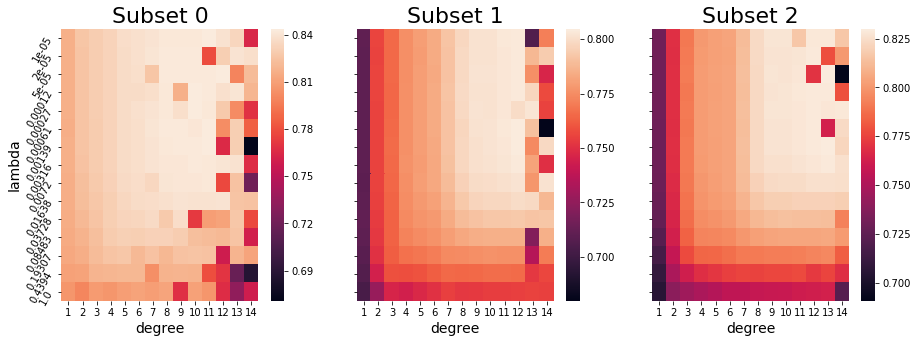

In [194]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax0, ax1, ax2 = axes.flatten()

plt.subplot(1,3,1)
fig0 = sns.heatmap(accuracies[0])
fig0.set_yticklabels(np.round(lambdas, 5), rotation=60)
fig0.set_xticklabels(degrees)
fig0.set_xlabel('degree', fontsize=14)
fig0.set_ylabel('lambda', fontsize=14)
fig0.set_title('Subset 0', fontsize=22)
plt.subplot(1,3,2)
fig1 = sns.heatmap(accuracies[1])
fig1.set_xticklabels(degrees)
fig1.set_yticklabels([])
fig1.set_xlabel('degree', fontsize=14)
fig1.set_ylabel('')
fig1.set_title('Subset 1', fontsize=22)
plt.subplot(1,3,3)
fig2 = sns.heatmap(accuracies[2])
fig2.set_xticklabels(degrees)
fig2.set_yticklabels([])
fig2.set_xlabel('degree', fontsize=14)
fig2.set_ylabel('')
fig2.set_title('Subset 2', fontsize=22)

In [195]:
#Save figure
fig.savefig("heatmaps_sns.png")

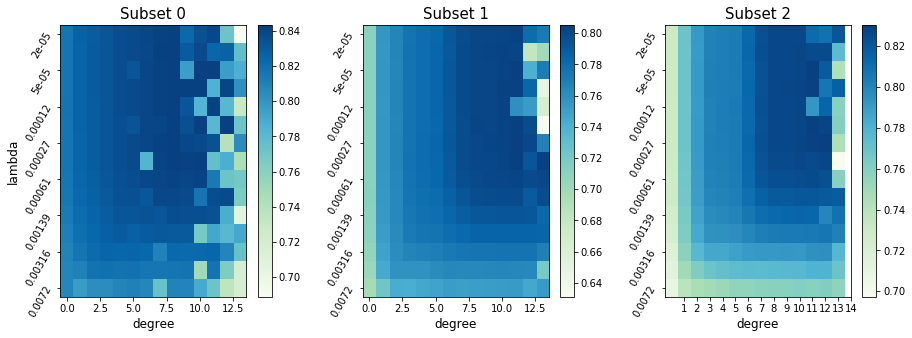

In [172]:
# Version matplotlib
degrees = np.arange(1, 15)
lambdas = np.logspace(-5, 0, 15)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax0, ax1, ax2 = axes.flatten()

d0 = ax0.imshow(accuracies[0], cmap='GnBu', aspect='auto')
ax0.set_yticklabels(np.round(lambdas, 5), rotation=60)
#ax0.set_xticklabels(degrees)
plt.xticks(degrees)
ax0.set_xlabel('degree', fontsize=12)
ax0.set_ylabel('lambda', fontsize=12)
ax0.set_title('Subset 0', fontsize=15)
fig.colorbar(d0, ax=ax0)

d1 = ax1.imshow(accuracies[1], cmap='GnBu', aspect='auto')
ax1.set_yticklabels(np.round(lambdas, 5), rotation=60)
#ax1.set_xticklabels(degrees)
#plt.xticks(degrees)
#plt.gca().set_xticks(degrees)
ax1.set_xlabel('degree', fontsize=12)
ax1.set_ylabel('') 
ax1.set_title('Subset 1', fontsize=15)
fig.colorbar(d1, ax=ax1)

d2 = ax2.imshow(accuracies[2], cmap='GnBu', aspect='auto')
ax2.set_yticklabels(np.round(lambdas, 5), rotation=60)
#ax2.set_xticklabels(degrees)
plt.xticks(degrees)
ax2.set_xlabel('degree', fontsize=12)
ax2.set_ylabel('')
ax2.set_title('Subset 2', fontsize=15)
fig.colorbar(d2, ax=ax2)

plt.subplots_adjust(wspace=0.3)

In [171]:
#Save figure
fig.savefig("heatmaps.png")

In [102]:
# y: ↓ (lambdas), x: → (degree)
for nb, acc in enumerate(accuracies):
    print('SUBSET {}'.format(nb))
    ymax = np.asscalar(np.where(acc == np.max(acc))[0])
    xmax = np.asscalar(np.where(acc == np.max(acc))[1])
    
    print('Best degree for subset {}: {}'.format(nb, degrees[xmax]))
    print('Best lambda for subset {}: {}'.format(nb, lambdas[ymax]))
    print('Accuracy: {}'.format(acc[ymax][xmax]))

SUBSET 0
Best degree for subset 0: 12
Best lambda for subset 0: 5.1794746792312125e-05
Accuracy: 0.8433938029589187
SUBSET 1
Best degree for subset 1: 12
Best lambda for subset 1: 0.0013894954943731374
Accuracy: 0.8052589730778269
SUBSET 2
Best degree for subset 2: 13
Best lambda for subset 2: 0.0013894954943731374
Accuracy: 0.8304178644771468


In [87]:
np.amax(accuracies[0])

0.8435639350599444

## Submission

_We now interpolate the data thanks to the model defined 2 cells higher..._

**TODO**: change this part if we use different models for each part!

In [ ]:
y_submit = []
for (x_test,y_test),meth in zip(clean_data_tests,methods):
    w_fin,loss = meth(y_train,x_train)
    y_test = x_test @ w_fin
    print(y_test)
    y_test = [-1 if i < 0.5 else 1.0 for i in y_test]
    y_submit.append(y_test)
y_submit = np.concatenate(y_submit,axis = 0)

_And finally save the results to csv._

In [ ]:
hlp.create_csv_submission(ids_test,y_submit,"obiwan.csv")

## Gianni's corner
_desole mec, javais cru que tu modifierais mon code: comme la cellule avait pas changé, javais pensé que tavais pas modifié mon code dans le main, seulement les fctions ==> jai pas pensé a scroller plus bas :/ jy ai quand meme laissé dans le doute_

#### Remove zero variance

In [ ]:
#G
x_trains = spl.split_categorical_data(tX,22,labels = y,split = True)
x_tests = spl.split_categorical_data(tX_test,22,split = True)

In [ ]:
#G
# Sanity check
print('Shape of category 0: {} x {}'.format(x_trains[0][0].shape[0], x_trains[0][0].shape[1]))
print('Shape of category 1: {} x {}'.format(x_trains[1][0].shape[0], x_trains[1][0].shape[1]))
print('Shape of category 2 and 3: {} x {}'.format(x_trains[2][0].shape[0], x_trains[2][0].shape[1]))

print('Total: {}'.format(x_trains[0][0].shape[0] + x_trains[1][0].shape[0] + x_trains[2][0].shape[0]))

In [ ]:
#G
reduced_x_trains = []
reduced_x_tests = []
for i in range(len(x_trains)):
    tr = x_trains[i][0]
    te = x_tests[i]
    
    x_tr, x_te = pre.clean_variance(tr, te, inplace=False)
    reduced_x_trains.append((x_tr, x_trains[i][1])) # x_trains[i][1] = labels
    reduced_x_tests.append(x_te)

In [ ]:
#G
# Sanity check
print('Shape of category 0 (train): {} x {}'.format(reduced_x_trains[0][0].shape[0], reduced_x_trains[0][0].shape[1]))
print('Shape of category 0 (test): {} x {}'.format(reduced_x_tests[0].shape[0], reduced_x_tests[0].shape[1]))

print('Shape of category 1 (train): {} x {}'.format(reduced_x_trains[1][0].shape[0], reduced_x_trains[1][0].shape[1]))
print('Shape of category 1 (test): {} x {}'.format(reduced_x_tests[1].shape[0], reduced_x_tests[1].shape[1]))

print('Shape of category 2 and 3 (train): {} x {}'.format(reduced_x_trains[2][0].shape[0], reduced_x_trains[2][0].shape[1]))
print('Shape of category 2 and 3 (test): {} x {}'.format(reduced_x_tests[2].shape[0], reduced_x_tests[2].shape[1]))


In [ ]:
#G
# on veut clean les variances nulles dans le train ET dans le test
# we don't care about labels here
#for (tr, te) in zip(x_trains[0], x_test[0]):
#    blablabla

## Data Processing

#### Data standardization

In [ ]:
#G
std_train_0, mu_0, sigma_0 = pre.standardize_data(reduced_x_trains[0][0])
std_test_0, mu_0, sigma_0 = pre.standardize_data(reduced_x_tests[0], mu_0, sigma_0)

In [ ]:
#G
# Sanity check
print('Shape of category 0 (std train): {} x {}'.format(std_train_0.shape[0], std_train_0.shape[1]))
print('Shape of category 0 (std test): {} x {}'.format(std_test_0.shape[0], std_test_0.shape[1]))

## Put your useful trash here

In [ ]:
#trash random dataframe
np.random.seed(2)
df = pd.DataFrame(np.random.randint(-1002,-995,size =(3,4)), columns=list('ABCD'))
df.replace(to_replace = -999,value = np.nan)

In [ ]:
#Yann
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)